Librerías necesarias

In [1]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Funciones

In [3]:
def median(v):
    return np.median(v)

def mean(v):
    return np.mean(v)

#============================================================No ML============================================================
def bars_noML(values, coordinate, metric):
    values = values.astype(float)
    categories = [r"$R_1$", r"$R_2$", r"$R_3$", r"$R_4$", r"$R_5$"]
    subcategories = []
    if coordinate=="theta": subcategories = [r"$\theta_1(t)$", r"$\theta_2(t)$", r"$\theta_3(t)$"]
    else: subcategories = [r"$\phi_1(t)$", r"$\phi_2(t)$", r"$\phi_3(t)$"]
    colors = ["green", "gray", "brown"]

    x = np.arange(len(categories))
    width = 0.25

    fig, ax = plt.subplots()
    for i, subcat in enumerate(subcategories):
        bars = ax.bar(x - width + i * width, values[:, i], width=width, label=subcat, color=colors[i])

        # Para texto
        cont = 0
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{values[cont, i]}', ha='center', va='bottom', fontsize=7.5)
            cont = cont + 1

    #print(values)
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_yticks(np.arange(0, 101, 10))
    ax.legend(title="Solución analítica", markerscale=0.85, fontsize=8.5)
    ax.set_ylabel(f"{metric} (%)")
    if coordinate=="theta": ax.set_title(f"{metric} de las soluciones teóricas de "+r"$\theta(t)$"+" de todos los experimentos")
    else: ax.set_title(f"{metric} de las soluciones teóricas de "+r"$\phi(t)$"+" de todos los experimentos")
    plt.ylim(top=1.40*values.max())
    plt.xlabel("Radio inicial")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def bars_MAPEMdAPE_noML(values, coordinate):
    values = values.astype(float)
    categories = []
    if coordinate=="theta": categories = [r"$\theta_1(t)$", r"$\theta_2(t)$", r"$\theta_3(t)$"]
    else: categories = [r"$\phi_1(t)$", r"$\phi_2(t)$", r"$\phi_3(t)$"]
    subcategories = ["MAPE", "MdAPE"]
    colors = ["red", "blue"]

    x = np.arange(len(categories))
    width = 0.25

    fig, ax = plt.subplots()
    for i, subcat in enumerate(subcategories):
        bars = ax.bar(x - 0.5*width + i * width, values[:, i], width=width, label=subcat, color=colors[i])

        # Para texto
        cont = 0
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{values[cont, i]}', ha='center', va='bottom', fontsize=7.5)
            cont = cont + 1

    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_yticks(np.arange(0, 101, 10))
    ax.legend(title="Métrica de error porcentual", markerscale=0.85, fontsize=8.5)
    ax.set_ylabel("MAPE/MdAPE (%)")
    if coordinate=="theta": ax.set_title("MAPE y MdAPE de las soluciones teóricas de "+r"$\theta(t)$"+" de todos los experimentos")
    else: ax.set_title("MAPE y MdAPE de las soluciones teóricas de "+r"$\phi(t)$"+" de todos los experimentos")
    plt.ylim(top=1.40*values.max())
    plt.xlabel("Solución analítica")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def bars_metric_system_noML(values, coordinate, metric):
    values = values.astype(float)
    categories = ["Sistema 1", "Sistema 2", "Sistema 3"]
    subcategories = []
    if coordinate=="theta": subcategories = [r"$\theta_1(t)$", r"$\theta_2(t)$", r"$\theta_3(t)$"]
    else: subcategories = [r"$\phi_1(t)$", r"$\phi_2(t)$", r"$\phi_3(t)$"]
    colors = ["green", "gray", "brown"]

    x = np.arange(len(categories))
    width = 0.25

    fig, ax = plt.subplots()
    for i, subcat in enumerate(subcategories):
        bars = ax.bar(x + (i-(len(subcategories)-1)/2)*width, values[:, i], width=width, label=subcat, color=colors[i])

        # Para texto
        cont = 0
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{values[cont, i]}', ha='center', va='bottom', fontsize=7.5)
            cont = cont + 1

    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_yticks(np.arange(0, 101, 10))
    ax.legend(title="Solución analítica", markerscale=0.85, fontsize=8.5)

    if metric=="MAPE": ax.set_ylabel("MAPE (%)")
    elif metric=="MdAPE": ax.set_ylabel("MdAPE (%)")
    else: ax.set_ylabel(r"$R^2$ (%)")

    if coordinate=="theta":
        if metric=="MAPE": ax.set_title("MAPE de las soluciones teóricas de "+r"$\theta(t)$"+" por sistema")
        elif metric=="MdAPE": ax.set_title("MdAPE de las soluciones teóricas de "+r"$\theta(t)$"+" por sistema")
        else: ax.set_title(r"$R^2$ de las soluciones teóricas de "+r"$\theta(t)$"+" por sistema")
    else:
        if metric=="MAPE": ax.set_title("MAPE de las soluciones teóricas de "+r"$\phi(t)$"+" por sistema")
        else: ax.set_title("MdAPE de las soluciones teóricas de "+r"$\phi(t)$"+" por sistema")

    plt.ylim(top=1.40*values.max())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()    

def bars_r2_noML(n1, n2, n3):
    names = [r"$\theta_1(t)$", r"$\theta_2(t)$", r"$\theta_3(t)$"]
    colors = ["green", "gray", "brown"]
    values = [n1, n2, n3]
    values = [float(x) for x in values]

    bars = plt.bar(names, values, color=colors, edgecolor="black")
    cont = 0
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{values[cont]}', ha='center', va='bottom', fontsize=7.5)
        cont = cont + 1
    
    plt.title(r"$R^2$ de soluciones analíticas para $\theta(t)$")
    plt.xlabel("Solución analítica")
    plt.ylabel(r"$R^2$ (%)")
    plt.ylim(top=1.40*max(values))
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

#============================================================ML============================================================
def barsMdAPE_ML(n1, n2, n3, i, coordinate):
    names = []
    if coordinate=="theta": names = ["RF", "XGB", "NN"]
    else:
        if i==1: names = [r"$\phi_1(t)+RF$", r"$\phi_1(t)+XGB$", r"$\phi_1(t)+NN$"]
        elif i==2: names = [r"$\phi_2(t)+RF$", r"$\phi_2(t)+XGB$", r"$\phi_2(t)+NN$"]
        else: names = [r"$\phi_3(t)+RF$", r"$\phi_3(t)+XGB$", r"$\phi_3(t)+NN$"]
    colors = ["#1b9e77", "#7570b3", "#d95f02"]
    values = [n1, n2, n3]
    values = [float(x) for x in values]

    bars = plt.bar(names, values, color=colors, edgecolor="black")
    cont = 0
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{values[cont]}', ha='center', va='bottom', fontsize=7.5)
        cont = cont + 1
    
    if coordinate=="theta":
        if i==1: plt.title(f"MdAPE de cada modelo en predicción de residuos de "+r"$\theta_1(t)$")
        elif i==2: plt.title(f"MdAPE de cada modelo en predicción de residuos de "+r"$\theta_2(t)$")
        else: plt.title(f"MdAPE de cada modelo en predicción de residuos de "+r"$\theta_3(t)$")
    else:
        if i==1: plt.title(f"MdAPE de cada modelo híbrido con "+r"$\phi_1(t)$")
        elif i==2: plt.title(f"MdAPE de cada modelo híbrido con "+r"$\phi_2(t)$")
        else: plt.title(f"MdAPE de cada modelo híbrido con "+r"$\phi_3(t)$")
        
    if coordinate=="theta": plt.xlabel("Modelo de aprendizaje automático")
    else: plt.xlabel("Solución híbrida")
    plt.ylabel("MdAPE (%)")
    plt.ylim(top=1.40*max(values))
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

def barsR2_ML(n1, n2, n3, sol):
    names = []
    if sol=="theta1": names = [r"$\theta_1(t)$+RF", r"$\theta_1(t)$+XGB", r"$\theta_1(t)$+NN"]
    elif sol=="theta2": names = [r"$\theta_2(t)$+RF", r"$\theta_2(t)$+XGB", r"$\theta_2(t)$+NN"]
    else: names = [r"$\theta_3(t)$+RF", r"$\theta_3(t)$+XGB", r"$\theta_3(t)$+NN"]
    colors = ["#1b9e77", "#7570b3", "#d95f02"]
    values = [n1, n2, n3]
    values = [float(x) for x in values]

    bars = plt.bar(names, values, color=colors, edgecolor="black")
    cont = 0
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{values[cont]}', ha='center', va='bottom', fontsize=7.5)
        cont = cont + 1
        
    if sol=="theta1": plt.title(r"R² de cada modelo híbrido de $\theta_1(t)$ con ML")
    elif sol=="theta2": plt.title(r"R² de cada modelo híbrido de $\theta_2(t)$ con ML")
    else: plt.title(r"R² de cada modelo híbrido de $\theta_3(t)$ con ML")
    plt.xlabel("Modelo híbrido")
    plt.ylabel("R² (%)")
    plt.ylim(top=1.40*max(values))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.yticks(np.arange(0, 101, 10))
    plt.show()

def barsMdAPE_ML_radius(values, sol):
    values = values.astype(float)
    categories = [r"$R_1$", r"$R_2$", r"$R_3$", r"$R_4$", r"$R_5$"]
    subcategories = []
    if sol=="theta1" or sol=="theta2" or sol=="theta3": subcategories = ["Random Forest", "XG Boost", "Redes Neuronales"]
    else:
        if sol=="phi1": subcategories = [r"$\phi_1(t)$+RF", r"$\phi_1(t)$+XGB", r"$\phi_1(t)$+NN"]
        elif sol=="phi2": subcategories = [r"$\phi_2(t)$+RF", r"$\phi_2(t)$+XGB", r"$\phi_2(t)$+NN"]
        else: subcategories = [r"$\phi_3(t)$+RF", r"$\phi_3(t)$+XGB", r"$\phi_3(t)$+NN"]
    colors = ["#1b9e77", "#7570b3", "#d95f02"]

    x = np.arange(len(categories))
    width = 0.25

    fig, ax = plt.subplots()
    for i, subcat in enumerate(subcategories):
        bars = ax.bar(x - width + i * width, values[:, i], width=width, label=subcat, color=colors[i])

        # Para texto
        cont = 0
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{values[cont, i]}', ha='center', va='bottom', fontsize=7.5)
            cont=cont+1
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_yticks(np.arange(0, 101, 10))
    ax.legend(title="Modelo de ML", markerscale=0.85, fontsize=8.5)
    ax.set_ylabel("MdAPE (%)")
    if sol=="theta1": ax.set_title(r"MdAPE de los modelos de ML en predicción de residuos de $\theta_1(t)$")
    elif sol=="theta2": ax.set_title(r"MdAPE de los modelos de ML en predicción de residuos de $\theta_2(t)$")
    elif sol=="theta3": ax.set_title(r"MdAPE de los modelos de ML en predicción de residuos de $\theta_3(t)$")
    elif sol=="phi1": ax.set_title(r"MdAPE de cada modelo híbrido con $\phi_1(t)$")
    elif sol=="phi2": ax.set_title(r"MdAPE de cada modelo híbrido con $\phi_2(t)$")
    else: ax.set_title(r"MdAPE de cada modelo híbrido con $\phi_3(t)$")
    plt.ylim(top=1.40*values.max())
    plt.xlabel("Radio inicial")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def bars_metric_system_ML(values, sol, metric):
    values = values.astype(float)
    categories = ["Sistema 1", "Sistema 2", "Sistema 3"]
    subcategories = []
    if metric=="MdAPE":
        if sol=="theta1" or sol=="theta2" or sol=="theta3": subcategories = ["Random Forest", "XG Boost", "Redes Neuronales"]
        elif sol=="phi1": subcategories = [r"$\phi_1(t)$+RF", r"$\phi_1(t)$+XGB", r"$\phi_1(t)$+NN"]
        elif sol=="phi2": subcategories = [r"$\phi_2(t)$+RF", r"$\phi_2(t)$+XGB", r"$\phi_2(t)$+NN"]
        else: subcategories = [r"$\phi_3(t)$+RF", r"$\phi_3(t)$+XGB", r"$\phi_3(t)$+NN"]
    else:
        if sol == "theta1": subcategories = [r"$\theta_1(t)$+RF", r"$\theta_1(t)$+XGB", r"$\theta_1(t)$+NN"]
        elif sol=="theta2": subcategories = [r"$\theta_2(t)$+RF", r"$\theta_2(t)$+XGB", r"$\theta_2(t)$+NN"]
        elif sol=="theta3": subcategories = [r"$\theta_3(t)$+RF", r"$\theta_3(t)$+XGB", r"$\theta_3(t)$+NN"]
        

    colors = ["#1b9e77", "#7570b3", "#d95f02"]

    x = np.arange(len(categories))
    width = 0.25

    fig, ax = plt.subplots()
    for i, subcat in enumerate(subcategories):
        bars = ax.bar(x - width + i * width, values[:, i], width=width, label=subcat, color=colors[i])

        # Para texto
        cont = 0
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{values[cont, i]}', ha='center', va='bottom', fontsize=7.5)
            cont=cont+1
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_yticks(np.arange(0, 101, 10))
    if metric=="MdAPE":
        if sol=="theta1" or sol=="theta2" or sol=="theta3": ax.legend(title="Modelo de ML", markerscale=0.85, fontsize=8.5)
        else: ax.legend(title="Modelo híbrido", markerscale=0.85, fontsize=8.5)
    else: ax.legend(title="Modelo híbrido", markerscale=0.85, fontsize=8.5)

    if metric=="MdAPE": ax.set_ylabel("MdAPE (%)")
    else: ax.set_ylabel(r"$R^2$ (%)")

    if sol=="theta1":
        if metric=="MdAPE": ax.set_title(r"MdAPE de los modelos de ML en predicción de residuos de $\theta_1(t)$")
        else: ax.set_title(r"$R^2$ de los modelos híbridos con $\theta_1(t)$")
    elif sol=="theta2":
        if metric=="MdAPE": ax.set_title(r"MdAPE de los modelos de ML en predicción de residuos de $\theta_2(t)$")
        else: ax.set_title(r"$R^2$ de los modelos híbridos con $\theta_2(t)$")
    elif sol=="theta3":
        if metric=="MdAPE": ax.set_title(r"MdAPE de los modelos de ML en predicción de residuos de $\theta_3(t)$")
        else: ax.set_title(r"$R^2$ de los modelos híbridos con $\theta_3(t)$")
    elif sol=="phi1": ax.set_title(r"MdAPE de cada modelo híbrido con $\phi_1(t)$")
    elif sol=="phi2": ax.set_title(r"MdAPE de cada modelo híbrido con $\phi_2(t)$")
    else: ax.set_title(r"MdAPE de cada modelo híbrido con $\phi_3(t)$")
    plt.ylim(top=1.40*values.max())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def barsR2_ML_radius(values, sol):
    values = values.astype(float)
    categories = [r"$R_1$", r"$R_2$", r"$R_3$", r"$R_4$", r"$R_5$"]
    subcategories = []
    if sol=="theta1": subcategories = [r"$\theta_1(t)$+RF", r"$\theta_1(t)$+XGB", r"$\theta_1(t)$+NN"]
    elif sol=="theta2": subcategories = [r"$\theta_2(t)$+RF", r"$\theta_2(t)$+XGB", r"$\theta_2(t)$+NN"]
    else: subcategories = [r"$\theta_3(t)$+RF", r"$\theta_3(t)$+XGB", r"$\theta_3(t)$+NN"]
    
    colors = ["#1b9e77", "#7570b3", "#d95f02"]

    x = np.arange(len(categories))
    width = 0.25

    fig, ax = plt.subplots()
    for i, subcat in enumerate(subcategories):
        bars = ax.bar(x - width + i * width, values[:, i], width=width, label=subcat, color=colors[i])

        # Para texto
        cont = 0
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{values[cont, i]}', ha='center', va='bottom', fontsize=7.5)
            cont=cont+1
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_yticks(np.arange(0, 101, 10))
    ax.legend(title="Modelo híbrido", markerscale=0.85, fontsize=8.5)
    ax.set_ylabel("R² (%)")
    if sol=="theta1": ax.set_title(r"R² de los modelos híbridos de ML con $\theta_1(t)$")
    elif sol=="theta2": ax.set_title(r"R² de los modelos híbridos de ML con $\theta_2(t)$")
    else: ax.set_title(r"R² de los modelos híbridos de ML con $\theta_3(t)$")
    plt.xlabel("Radio inicial")
    plt.ylim(top=1.40*values.max())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#============================================================Error en tau============================================================
def errTau_general(n1, n2):
    names = ["Método 1", "Método 2"]
    colors = ["yellow", "red"]
    values = [n1, n2]
    values = [float(x) for x in values]

    bars = plt.bar(names, values, color=colors, edgecolor="black")
    cont = 0
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{values[cont]}', ha='center', va='bottom', fontsize=7.5)
        cont = cont + 1
        
    plt.title(r"Porcentaje de error en cálculo de período $\tau$")
    plt.ylabel("Error (%)")
    plt.ylim(top=1.40*max(values))
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

def errTau_system(values):
    values = values.astype(float)
    categories = ["Sistema 1", "Sistema 2", "Sistema 3"]
    subcategories = ["Método 1", "Método 2"]

    colors = ["yellow", "red"]

    x = np.arange(len(categories))
    width = 0.25

    fig, ax = plt.subplots()
    for i, subcat in enumerate(subcategories):
        bars = ax.bar(x + (i-(len(subcategories)-1)/2)*width, values[:, i], width=width, label=subcat, color=colors[i])

        # Para texto
        cont = 0
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{values[cont, i]}', ha='center', va='bottom', fontsize=7.5)
            cont=cont+1
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend(title="Método de cálculo", markerscale=0.85, fontsize=8.5)
    ax.set_title(r"Porcentaje de error en cálculo de período $\tau$ por sistema")
    
    plt.ylim(top=1.40*values.max())
    plt.ylabel("Error (%)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()  

def errTau_radius(values):
    values = values.astype(float)
    categories = [r"$R_1$", r"$R_2$", r"$R_3$", r"$R_4$", r"$R_5$"]
    subcategories = ["Método 1", "Método 2"]
    
    colors = ["yellow", "red"]

    x = np.arange(len(categories))
    width = 0.25

    fig, ax = plt.subplots()
    for i, subcat in enumerate(subcategories):
        bars = ax.bar(x + (i-(len(subcategories)-1)/2)*width, values[:, i], width=width, label=subcat, color=colors[i])

        # Para texto
        cont = 0
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{values[cont, i]}', ha='center', va='bottom', fontsize=7.5)
            cont=cont+1
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    #ax.set_yticks(np.arange(0, 101, 10))
    ax.legend(title="Método de cálculo", markerscale=0.85, fontsize=8.5)
    ax.set_ylabel("Error (%)")
    ax.set_title(r"Porcentaje de error en cálculo de período $\tau$ por radio")
    
    plt.ylim(top=1.40*values.max())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#============================================================Error en theta_f============================================================
def errthetaf_general(n1):
    name = "Método de la asíntota vertical"
    color = "#4A90E2"
    n1 = float(n1)

    fig, ax = plt.subplots()

    bar = ax.bar([0], [n1], width=0.3, color=color, edgecolor="black")  

    ax.bar_label(bar, fmt="%.3g", padding=3, fontsize=8)

    ax.set_title(r"Porcentaje de error en cálculo de ángulo extremo $\theta_f$")
    ax.set_ylabel("Error (%)")
    ax.set_ylim(top=1.40 * n1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xticks([0])
    ax.set_xticklabels([name])

    ax.set_xlim(-0.5, 0.5)

    plt.show()

def errthetaf_system(n1, n2, n3):
    names = ["Sistema 1", "Sistema 2", "Sistema 3"]
    colors = ["#4A90E2", "#50C878", "#FF6F61"]
    values = [n1, n2, n3]
    values = [float(x) for x in values]
    values = np.array(values)

    bars = plt.bar(names, values, color=colors, edgecolor="black")
    cont = 0
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{values[cont]}', ha='center', va='bottom', fontsize=7.5)
        cont = cont + 1
        
    plt.title(r"Porcentaje de error en cálculo de ángulo extremo $\theta_f$ por sistema")
    plt.ylabel("Error (%)")
    plt.ylim(top=1.40*values.max())
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

def errthetaf_radius(n1, n2, n3, n4, n5):
    names = [r"$R_1$", r"$R_2$", r"$R_3$", r"$R_4$", r"$R_5$"]
    colors = ["#4A90E2", "#50C878", "#FF6F61", "#8E44AD", "#F4D03F"]
    values = [n1, n2, n3, n4, n5]
    values = [float(x) for x in values]
    values = np.array(values)

    bars = plt.bar(names, values, color=colors, edgecolor="black")
    cont = 0
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f'{values[cont]}', ha='center', va='bottom', fontsize=7.5)
        cont = cont + 1
        
    plt.title(r"Porcentaje de error en cálculo de ángulo extremo $\theta_f$ por radio")
    plt.ylabel("Error (%)")
    plt.ylim(top=1.40*values.max())
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

#====================================================Gráficos comparativos====================================================
def bars_comp(values, coordinate):
    values = values.astype(float)
    categories = ["1er. Conjunto", "2do. Conjunto", "3er. Conjunto"]
    subcategories = []
    if coordinate=="theta": subcategories = [r"$\theta_i(t)$", r"$\theta_i(t)+RF$", r"$\theta_i(t)+XGB$", r"$\theta_i(t)+NN$"]
    else: subcategories = [r"$\phi_i(t)$", r"$\phi_i(t)+RF$", r"$\phi_i(t)+XGB$", r"$\phi_i(t)+NN$"]
    colors = ["#F4D03F", "#1b9e77", "#7570b3", "#d95f02"]

    x = np.arange(len(categories))
    width = 0.20

    fig, ax = plt.subplots()
    cont2 = 0
    for i, subcat in enumerate(subcategories):
        bars = ax.bar(x + (i-(len(subcategories)-1)/2)*width, values[:, i], width=width, label=subcat, color=colors[i])

        # Para texto
        cont = 0
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{values[cont, i]}', ha='center', va='bottom', fontsize=7.5)
            cont = cont + 1
        
        cont2 += 1

    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.set_yticks(np.arange(0, 101, 10))
    ax.legend(title="Solución", markerscale=0.85, fontsize=8.5)

    if coordinate=="theta":
        ax.set_ylabel(r"$R^2$ (%)")
        ax.set_title(r"$R^2$ de todas las soluciones de $\theta(t)$")
    else:
        ax.set_ylabel("MdAPE (%)")
        ax.set_title(r"MdAPE de todas las soluciones de $\phi(t)$")

    plt.xlabel("Conjunto de Soluciones")
    plt.ylim(top=1.60*values.max())
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# **Gráficos de barras de MAPE (no ML;  por radio)**

## $\theta(t)$

In [135]:
# R1
R1_theta1_mape = [44.0, 15.8, 19.7, 10.4, 15.8, 18.0, 44.7, 18.0, 17.9]
R1_theta2_mape = [53.4, 15.0, 15.4, 9.43, 16.7, 19.8, 38.2, 20.7, 13.9]
R1_theta3_mape = [15.7, 17.7, 39.6, 18.2]

# R2
R2_theta1_mape = [29.2, 29.7, 19.3, 26.9, 20.6, 27.3, 15.4, 16.2, 25.4]
R2_theta2_mape = [30.9, 35.3, 18.9, 29.5, 14.4, 20.7, 8.57, 17.3, 21.1]
R2_theta3_mape = [29.9, 18.4, 16.5, 22.9, 16.6, 22.5]

# R3
R3_theta1_mape = [20.8, 34.8, 29.5, 13.0, 27.2, 14.8, 20.0, 19.3, 21.2]
R3_theta2_mape = [16.2, 25.5, 26.3, 10.2, 29.9, 14.8, 21.8, 18.6, 20.2]
R3_theta3_mape = [20.6, 18.4, 20.2]

# R4
R4_theta1_mape = [25.9, 32.4, 23.0, 33.4, 40.4, 20.8, 11.5, 36.9, 21.2]
R4_theta2_mape = [20.0, 29.8, 20.6, 41.5, 37.1, 12.1, 8.43, 33.3, 13.3]
R4_theta3_mape = [30.9, 21.5, 38.6]

# R5
R5_theta1_mape = [23.7, 57.8, 23.4, 40.4, 35.9, 19.8, 16.8, 33.0, 19.7]
R5_theta2_mape = [20.6, 55.9, 22.5, 37.3, 33.9, 17.6, 17.9, 32.6, 18.7]
R5_theta3_mape = [56.6, 22.9, 38.7, 34.8, 17.3, 19.1]

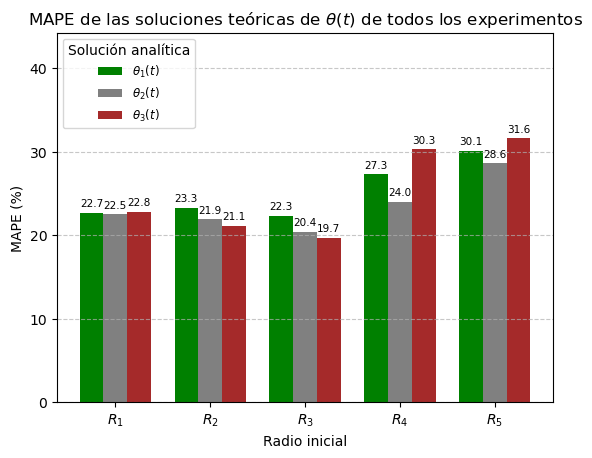

In [136]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(mean(R1_theta1_mape)))
vec1.append("{:.3g}".format(mean(R1_theta2_mape)))
vec1.append("{:.3g}".format(mean(R1_theta3_mape)))

vec2.append("{:.3g}".format(mean(R2_theta1_mape)))
vec2.append("{:.3g}".format(mean(R2_theta2_mape)))
vec2.append("{:.3g}".format(mean(R2_theta3_mape)))

vec3.append("{:.3g}".format(mean(R3_theta1_mape)))
vec3.append("{:.3g}".format(mean(R3_theta2_mape)))
vec3.append("{:.3g}".format(mean(R3_theta3_mape)))

vec4.append("{:.3g}".format(mean(R4_theta1_mape)))
vec4.append("{:.3g}".format(mean(R4_theta2_mape)))
vec4.append("{:.3g}".format(mean(R4_theta3_mape)))

vec5.append("{:.3g}".format(mean(R5_theta1_mape)))
vec5.append("{:.3g}".format(mean(R5_theta2_mape)))
vec5.append("{:.3g}".format(mean(R5_theta3_mape)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)

bars_noML(vec, "theta", "MAPE")

## $\phi(t)$

In [137]:
R1_phi1_mape = [49.5, 14.9, 18.9, 6.34, 24.4, 21.3, 216, 25.2, 8.05]
R1_phi2_mape = [16.0, 16.6, 27.0, 8.26, 19.0, 9.21, 20.1, 14.2, 14.7]
R1_phi3_mape = [21.2, 14.2, 80.1, 18.7]

# R2
R2_phi1_mape = [18.2, 26.7, 23.4, 26.4, 17.7, 30.2, 12.4, 16.0, 42.8]
R2_phi2_mape = [14.6, 6.49, 9.09, 12.3, 19.8, 19.6, 18.1, 13.0, 2.65]
R2_phi3_mape = [16.2, 15.0, 4.90, 4.25, 14.3, 17.6]

# R3
R3_phi1_mape = [15.8, 21.0, 38.3, 6.78, 20.4, 6.10, 13.7, 15.4, 17.6]
R3_phi2_mape = [12.5, 36.5, 5.67, 12.6, 10.9, 6.20, 8.24, 1.37, 2.04]
R3_phi3_mape = [10.5, 6.94, 7.25]

# R4
R4_phi1_mape = [75.7, 36.2, 21.3, 16.0, 51.7, 9.70, 3.52, 52.5, 5.72]
R4_phi2_mape = [86.3, 3.59, 4.84, 4.59, 6.17, 25.8, 9.20, 4.80, 19.6]
R4_phi3_mape = [17.1, 6.97, 24.8]

# R5
R5_phi1_mape = [7.02, 156, 12.6, 60.4, 39.1, 10.6, 1.82, 23.2, 8.50]
R5_phi2_mape = [12.1, 57.9, 5.35, 10.3, 12.4, 4.46, 3.10, 16.8, 1.55]
R5_phi3_mape = [98.6, 8.35, 31.2, 23.4, 2.10, 4.10]

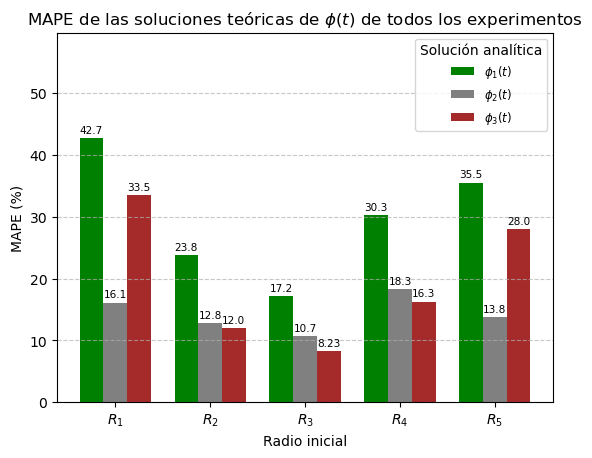

In [138]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(mean(R1_phi1_mape)))
vec1.append("{:.3g}".format(mean(R1_phi2_mape)))
vec1.append("{:.3g}".format(mean(R1_phi3_mape)))

vec2.append("{:.3g}".format(mean(R2_phi1_mape)))
vec2.append("{:.3g}".format(mean(R2_phi2_mape)))
vec2.append("{:.3g}".format(mean(R2_phi3_mape)))

vec3.append("{:.3g}".format(mean(R3_phi1_mape)))
vec3.append("{:.3g}".format(mean(R3_phi2_mape)))
vec3.append("{:.3g}".format(mean(R3_phi3_mape)))

vec4.append("{:.3g}".format(mean(R4_phi1_mape)))
vec4.append("{:.3g}".format(mean(R4_phi2_mape)))
vec4.append("{:.3g}".format(mean(R4_phi3_mape)))

vec5.append("{:.3g}".format(mean(R5_phi1_mape)))
vec5.append("{:.3g}".format(mean(R5_phi2_mape)))
vec5.append("{:.3g}".format(mean(R5_phi3_mape)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)

bars_noML(vec, "phi", "MAPE")

# **Gráficos de barras de MdAPE (no ML;  por radio)**

## $\theta(t)$

In [139]:
# R1
R1_theta1_mdape = [37.1, 11.5, 16.5, 8.37, 11.8, 14.8, 45.7, 14.2, 13.2]
R1_theta2_mdape = [37.5, 11.2, 12.0, 7.55, 12.7, 15.7, 28.3, 14.6, 9.68]
R1_theta3_mdape = [12.1, 13.4, 34.5, 12.5]

# R2
R2_theta1_mdape = [22.1, 23.3, 14.4, 22.2, 20.7, 26.5, 14.7, 11.8, 22.8]
R2_theta2_mdape = [22.5, 25.6, 13.3, 23.0, 11.9, 19.3, 7.59, 12.7, 16.7]
R2_theta3_mdape = [22.2, 12.9, 14.8, 22.0, 12.3, 18.6]

# R3
R3_theta1_mdape = [20.5, 26.8, 28.7, 9.91, 22.2, 12.1, 14.3, 14.6, 16.6]
R3_theta2_mdape = [14.9, 17.1, 23.4, 7.27, 22.2, 12.0, 15.9, 14.1, 15.6]
R3_theta3_mdape = [14.4, 13.6, 15.9]

# R4
R4_theta1_mdape = [18.2, 29.1, 20.8, 29.6, 37.2, 19.5, 9.48, 33.0, 20.9]
R4_theta2_mdape = [13.6, 24.0, 16.2, 31.8, 31.2, 9.91, 7.03, 27.1, 11.8]
R4_theta3_mdape = [26.9, 17.6, 33.8]

# R5
R5_theta1_mdape = [14.2, 45.1, 21.3, 35.7, 32.0, 18.8, 13.5, 26.2, 18.5]
R5_theta2_mdape = [12.4, 40.7, 20.3, 30.4, 27.8, 16.3, 14.6, 26.0, 15.9]
R5_theta3_mdape = [43.0, 20.7, 33.0, 29.6, 13.5, 16.5]

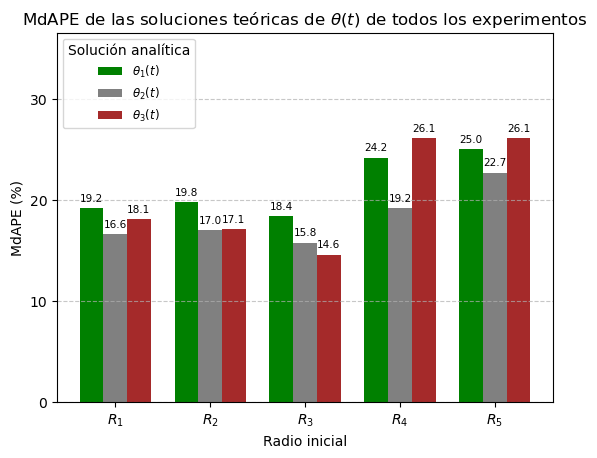

In [140]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(mean(R1_theta1_mdape)))
vec1.append("{:.3g}".format(mean(R1_theta2_mdape)))
vec1.append("{:.3g}".format(mean(R1_theta3_mdape)))

vec2.append("{:.3g}".format(mean(R2_theta1_mdape)))
vec2.append("{:.3g}".format(mean(R2_theta2_mdape)))
vec2.append("{:.3g}".format(mean(R2_theta3_mdape)))

vec3.append("{:.3g}".format(mean(R3_theta1_mdape)))
vec3.append("{:.3g}".format(mean(R3_theta2_mdape)))
vec3.append("{:.3g}".format(mean(R3_theta3_mdape)))

vec4.append("{:.3g}".format(mean(R4_theta1_mdape)))
vec4.append("{:.3g}".format(mean(R4_theta2_mdape)))
vec4.append("{:.3g}".format(mean(R4_theta3_mdape)))

vec5.append("{:.3g}".format(mean(R5_theta1_mdape)))
vec5.append("{:.3g}".format(mean(R5_theta2_mdape)))
vec5.append("{:.3g}".format(mean(R5_theta3_mdape)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)

bars_noML(vec, "theta", "MdAPE")

## $\phi(t)$

In [141]:
# R1
R1_phi1_mdape = [48.6, 12.7, 12.5, 5.80, 23.3, 20.7, 213, 21.6, 5.65]
R1_phi2_mdape = [14.8, 14.4, 20.5, 7.77, 18.0, 8.35, 20.7, 10.6, 12.3]
R1_phi3_mdape = [20.4, 13.8, 91.3, 15.7]

# R2
R2_phi1_mdape = [17.4, 24.8, 22.7, 25.1, 16.5, 28.4, 11.5, 13.8, 42.1]
R2_phi2_mdape = [13.9, 4.66, 8.32, 11.0, 20.3, 20.2, 18.4, 10.8, 1.99]
R2_phi3_mdape = [15.4, 14.6, 3.38, 2.75, 12.2, 18.7]

# R3
R3_phi1_mdape = [14.8, 16.4, 37.3, 5.96, 19.0, 5.66, 12.1, 15.0, 16.9]
R3_phi2_mdape = [12.1, 31.5, 4.40, 11.9, 9.35, 5.76, 6.62, 0.802, 1.48]
R3_phi3_mdape = [9.15, 6.72, 6.90]

# R4
R4_phi1_mdape = [11.3, 35.3, 20.7, 15.2, 48.8, 6.44, 1.94, 52.0, 3.11]
R4_phi2_mdape = [21.6, 2.38, 4.79, 4.20, 3.36, 22.5, 7.66, 3.68, 17.2]
R4_phi3_mdape = [17.3, 6.90, 24.3]

# R5
R5_phi1_mdape = [5.09, 154, 11.8, 60.0, 38.2, 9.80, 0.895, 22.5, 7.97]
R5_phi2_mdape = [10.2, 55.4, 4.45, 8.79, 11.1, 4.19, 2.47, 16.1, 0.927]
R5_phi3_mdape = [17.3, 6.90, 24.3]

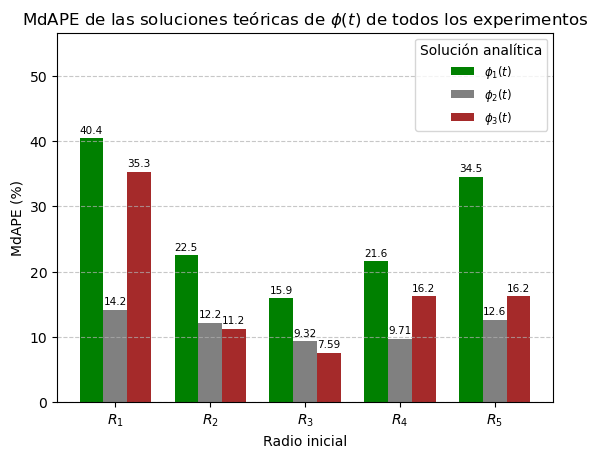

In [142]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(mean(R1_phi1_mdape)))
vec1.append("{:.3g}".format(mean(R1_phi2_mdape)))
vec1.append("{:.3g}".format(mean(R1_phi3_mdape)))

vec2.append("{:.3g}".format(mean(R2_phi1_mdape)))
vec2.append("{:.3g}".format(mean(R2_phi2_mdape)))
vec2.append("{:.3g}".format(mean(R2_phi3_mdape)))

vec3.append("{:.3g}".format(mean(R3_phi1_mdape)))
vec3.append("{:.3g}".format(mean(R3_phi2_mdape)))
vec3.append("{:.3g}".format(mean(R3_phi3_mdape)))

vec4.append("{:.3g}".format(mean(R4_phi1_mdape)))
vec4.append("{:.3g}".format(mean(R4_phi2_mdape)))
vec4.append("{:.3g}".format(mean(R4_phi3_mdape)))

vec5.append("{:.3g}".format(mean(R5_phi1_mdape)))
vec5.append("{:.3g}".format(mean(R5_phi2_mdape)))
vec5.append("{:.3g}".format(mean(R5_phi3_mdape)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)

bars_noML(vec, "phi", "MdAPE")

# **Gráficos de barras MAPE, MdAPE**

## $\theta(t)$

In [143]:
theta1_mape = [44.0, 15.8, 19.7, 10.4, 15.8, 18.0, 44.7, 18.0, 17.9, 29.2, 29.7, 19.3, 26.9, 20.6, 27.3, 15.4, 16.2, 25.4, 20.8, 34.8, 29.5, 13.0, 27.2, 14.8, 20.0, 19.3, 21.2, 25.9, 32.4, 23.0, 33.4, 40.4, 20.8, 11.5, 36.9, 21.2, 23.7, 57.8, 23.4, 40.4, 35.9, 19.8, 16.8, 33.0, 19.7, 17.3, 30.5, 24.8, 28.5, 18.8, 13.4, 25.3, 10.5, 34.0]
theta2_mape = [53.4, 15.0, 15.4, 9.43, 16.7, 19.8, 38.2, 20.7, 13.9, 30.9, 35.3, 18.9, 29.5, 14.4, 20.7, 8.57, 17.3, 21.1, 16.2, 25.5, 26.3, 10.2, 29.9, 14.8, 21.8, 18.6, 20.2, 20.0, 29.8, 20.6, 41.5, 37.1, 12.1, 8.43, 33.3, 13.3, 20.6, 55.9, 22.5, 37.3, 33.9, 17.6, 17.9, 32.6, 18.7, 14.9, 33.8, 17.0, 32.2, 17.6, 13.4, 27.9, 10.4, 28.9]
theta3_mape = [15.7, 17.7, 39.6, 18.2, 29.9, 18.4, 16.5, 22.9, 16.6, 22.5, 20.6, 18.4, 20.2, 30.9, 21.5, 38.6, 56.6, 22.9, 38.7, 34.8, 17.3, 19.1, 18.0, 26.1, 30.8]

theta1_mdape = [37.1, 11.5, 16.5, 8.37, 11.8, 14.8, 45.7, 14.2, 13.2, 22.1, 23.3, 14.4, 22.2, 20.7, 26.5, 14.7, 11.8, 22.8, 20.5, 26.8, 28.7, 9.91, 22.2, 12.1, 14.3, 14.6, 16.6, 18.2, 29.1, 20.8, 29.6, 37.2, 19.5, 9.48, 33.0, 20.9, 14.2, 45.1, 21.3, 35.7, 32.0, 18.8, 13.5, 26.2, 18.5, 13.4, 23.5, 20.2, 24.2, 16.6, 9.80, 18.6, 9.05, 32.6]
theta2_mdape = [37.5, 11.2, 12.0, 7.55, 12.7, 15.7, 28.3, 14.6, 9.68, 22.5, 25.6, 13.3, 23.0, 11.9, 19.3, 7.59, 12.7, 16.7, 14.9, 17.1, 23.4, 7.27, 22.2, 12.0, 15.9, 14.1, 15.6, 13.6, 24.0, 16.2, 31.8, 31.2, 9.91, 7.03, 27.1, 11.8, 12.4, 40.7, 20.3, 30.4, 27.8, 16.3, 14.6, 26.0, 15.9, 11.5, 23.1, 13.6, 24.6, 14.3, 10.1, 20.6, 9.03, 24.1]
theta3_mdape = [12.1, 13.4, 34.5, 12.5, 22.2, 12.9, 14.8, 22.0, 12.3, 18.6, 14.4, 13.6, 15.9, 26.9, 17.6, 33.8, 43.0, 20.7, 33.0, 29.6, 13.5, 16.5, 15.6, 19.5, 26.8]

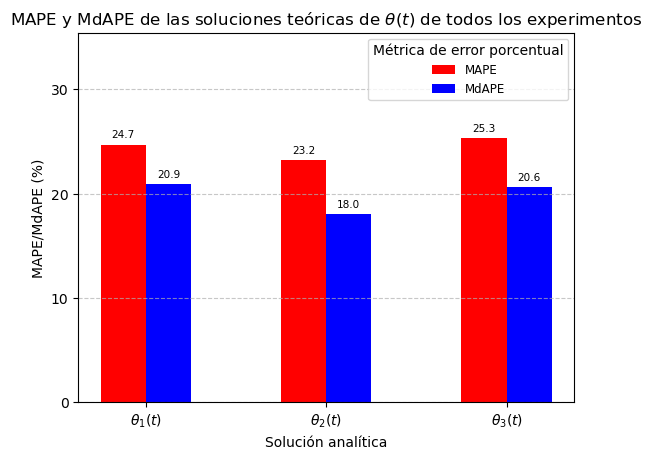

In [144]:
vec = []

vec1 = []
vec2 = []
vec3 = []

vec1.append("{:.3g}".format(mean(theta1_mape)))
vec1.append("{:.3g}".format(mean(theta1_mdape)))

vec2.append("{:.3g}".format(mean(theta2_mape)))
vec2.append("{:.3g}".format(mean(theta2_mdape)))

vec3.append("{:.3g}".format(mean(theta3_mape)))
vec3.append("{:.3g}".format(mean(theta3_mdape)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)
bars_MAPEMdAPE_noML(vec, "theta")

## $\phi(t)$

In [145]:
phi1_mape = [49.5, 14.9, 18.9, 6.34, 24.4, 21.3, 216, 25.2, 8.05, 18.2, 26.7, 23.4, 26.4, 17.7, 30.2, 12.4, 16.0, 42.8, 15.8, 21.0, 38.3, 6.78, 20.4, 6.10, 13.7, 15.4, 17.6, 75.7, 36.2, 21.3, 16.0, 51.7, 9.70, 3.52, 52.5, 5.72, 7.02, 156, 12.6, 60.4, 39.1, 10.6, 1.82, 23.2, 8.50, 22.1, 61.4, 20.5, 15.5, 13.1, 8.37, 18.6, 17.3, 45.6]
phi2_mape = [16.0, 16.6, 27.0, 8.26, 19.0, 9.21, 20.1, 14.2, 14.7, 14.6, 6.49, 9.09, 12.3, 19.8, 19.6, 18.1, 13.0, 2.65, 12.5, 36.5, 5.67, 12.6, 10.9, 6.20, 8.24, 1.37, 2.04, 86.3, 3.59, 4.84, 4.59, 6.17, 25.8, 9.20, 4.80, 19.6, 12.1, 57.9, 5.35, 10.3, 12.4, 4.46, 3.10, 16.8, 1.55, 26.9, 47.3, 34.7, 4.47, 2.04, 5.23, 8.65, 17.7, 9.94]
phi3_mape = [21.2, 14.2, 80.1, 18.7, 16.2, 15.0, 4.90, 4.25, 14.3, 17.6, 10.5, 6.94, 7.25, 17.1, 6.97, 24.8, 98.6, 8.35, 31.2, 23.4, 2.10, 4.10, 6.44, 12.7, 14.6]

phi1_mdape = [48.6, 12.7, 12.5, 5.80, 23.3, 20.7, 213, 21.6, 5.65, 17.4, 24.8, 22.7, 25.1, 16.5, 28.4, 11.5, 13.8, 42.1, 14.8, 16.4, 37.3, 5.96, 19.0, 5.66, 12.1, 15.0, 16.9, 11.3, 35.3, 20.7, 15.2, 48.8, 6.44, 1.94, 52.0, 3.11, 5.09, 154, 11.8, 60.0, 38.2, 9.80, 0.895, 22.5, 7.97, 12.9, 40.1, 16.8, 14.5, 12.3, 7.93, 16.9, 6.11, 44.5]
phi2_mdape = [14.8, 14.4, 20.5, 7.77, 18.0, 8.35, 20.7, 10.6, 12.3, 13.9, 4.66, 8.32, 11.0, 20.3, 20.2, 18.4, 10.8, 1.99, 12.1, 31.5, 4.40, 11.9, 9.35, 5.76, 6.62, 0.802, 1.48, 21.6, 2.38, 4.79, 4.20, 3.36, 22.5, 7.66, 3.68, 17.2, 10.2, 55.4, 4.45, 8.79, 11.1, 4.19, 2.47, 16.1, 0.927, 17.6, 26.7, 30.8, 3.27, 0.872, 4.79, 6.98, 6.42, 10.2]
phi3_mdape = [20.4, 13.8, 91.3, 15.7, 15.4, 14.6, 3.38, 2.75, 12.2, 18.7, 9.15, 6.72, 6.90, 17.3, 6.90, 24.3, 101.7, 7.76, 32.8, 23.2, 1.41, 3.70, 5.82, 11.4, 15.0]

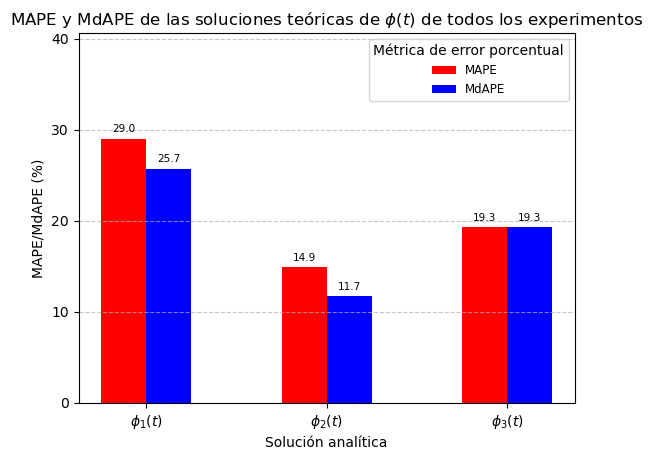

In [146]:
vec = []

vec1 = []
vec2 = []
vec3 = []

vec1.append("{:.3g}".format(mean(phi1_mape)))
vec1.append("{:.3g}".format(mean(phi1_mdape)))

vec2.append("{:.3g}".format(mean(phi2_mape)))
vec2.append("{:.3g}".format(mean(phi2_mdape)))

vec3.append("{:.3g}".format(mean(phi3_mape)))
vec3.append("{:.3g}".format(mean(phi3_mdape)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)
bars_MAPEMdAPE_noML(vec, "phi")

# **Gráficos de barras MAPE (no ML;  por sistema)**

## $\theta(t)$

In [147]:
theta1_mape_system1 = [44.0, 15.8, 19.7, 29.2, 29.7, 19.3, 20.8, 34.8, 29.5, 25.9, 32.4, 23.0, 23.7, 57.8, 23.4, 17.3, 30.5, 24.8]
theta2_mape_system1 = [53.4, 15.0, 15.4, 30.9, 35.3, 18.9, 16.2, 25.5, 26.3, 20.0, 29.8, 20.6, 20.6, 55.9, 22.5, 14.9, 33.8, 17.0]
theta3_mape_system1 = [29.9, 18.4, 30.9, 21.5, 56.6, 22.9]

theta1_mape_system2 = [10.4, 15.8, 18.0, 26.9, 20.6, 27.3, 13.0, 27.2, 14.8, 33.4, 40.4, 20.8, 40.4, 35.9, 19.8, 28.5, 18.8, 13.4]
theta2_mape_system2 = [9.43, 16.7, 19.8, 29.5, 14.4, 20.7, 10.2, 29.9, 14.8, 41.5, 37.1, 12.1, 37.3, 33.9, 17.6, 32.2, 17.6, 13.4]
theta3_mape_system2 = [15.7, 17.7, 16.5, 22.9, 38.6, 38.7, 34.8, 18.0]

theta1_mape_system3 = [44.7, 18.0, 17.9, 15.4, 16.2, 25.4, 20.0, 19.3, 21.2, 11.5, 36.9, 21.2, 16.8, 33.0, 19.7, 25.3, 10.5, 34.0]
theta2_mape_system3 = [38.2, 20.7, 13.9, 8.57, 17.3, 21.1, 21.8, 18.6, 20.2, 8.43, 33.3, 13.3, 17.9, 32.6, 18.7, 27.9, 10.4, 28.9]
theta3_mape_system3 = [39.6, 18.2, 16.6, 22.5, 20.6, 18.4, 20.2, 17.3, 19.1, 26.1, 30.8]

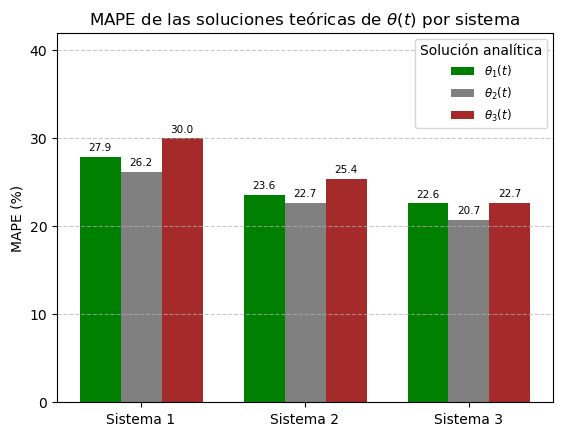

In [148]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(mean(theta1_mape_system1)))
vec1.append("{:.3g}".format(mean(theta2_mape_system1)))
vec1.append("{:.3g}".format(mean(theta3_mape_system1)))

vec2.append("{:.3g}".format(mean(theta1_mape_system2)))
vec2.append("{:.3g}".format(mean(theta2_mape_system2)))
vec2.append("{:.3g}".format(mean(theta3_mape_system2)))

vec3.append("{:.3g}".format(mean(theta1_mape_system3)))
vec3.append("{:.3g}".format(mean(theta2_mape_system3)))
vec3.append("{:.3g}".format(mean(theta3_mape_system3)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_noML(vec, "theta", "MAPE")

## $\phi(t)$

In [149]:
phi1_mape_system1 = [49.5, 14.9, 18.9, 18.2, 26.7, 23.4, 15.8, 21.0, 38.3, 75.7, 36.2, 21.3, 7.02, 156, 12.6, 22.1, 61.4, 20.5]
phi2_mape_system1 = [16.0, 16.6, 27.0, 14.6, 6.49, 9.09, 12.5, 36.5, 5.67, 86.3, 3.59, 4.84, 12.1, 57.9, 5.35, 26.9, 47.3, 34.7]
phi3_mape_system1 = [16.2, 15.0, 17.1, 6.97, 98.6, 8.35]

phi1_mape_system2 = [6.34, 24.4, 21.3, 26.4, 17.7, 30.2, 6.78, 20.4, 6.10, 16.0, 51.7, 9.70, 60.4, 39.1, 10.6, 15.5, 13.1, 8.37]
phi2_mape_system2 = [8.26, 19.0, 9.21, 12.3, 19.8, 19.6, 12.6, 10.9, 6.20, 4.59, 6.17, 25.8, 10.3, 12.4, 4.46, 4.47, 2.04, 5.23]
phi3_mape_system2 = [21.2, 14.2, 10.5, 6.94, 24.8, 31.2, 23.4, 6.44]

phi1_mape_system3 = [216, 25.2, 8.05, 12.4, 16.0, 42.8, 13.7, 15.4, 17.6, 3.52, 52.5, 5.72, 1.82, 23.2, 8.50, 18.6, 17.3, 45.6]
phi2_mape_system3 = [20.1, 14.2, 14.7, 18.1, 13.0, 2.65, 8.24, 1.37, 2.04, 9.20, 4.80, 19.6, 3.10, 16.8, 1.55, 8.65, 17.7, 9.94]
phi3_mape_system3 = [80.1, 18.7, 14.3, 17.6, 10.5, 6.94, 7.25, 2.10, 4.10, 12.7, 14.6]

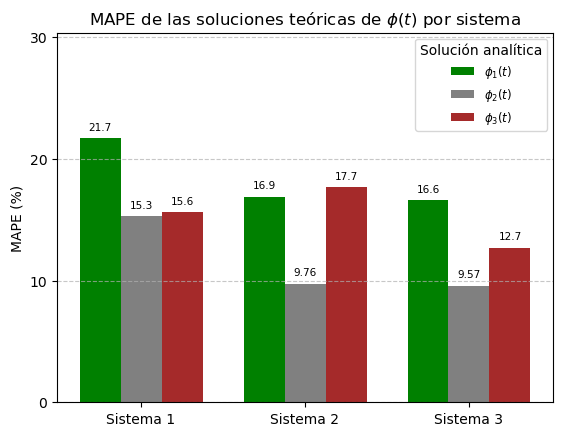

In [150]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(median(phi1_mape_system1)))
vec1.append("{:.3g}".format(median(phi2_mape_system1)))
vec1.append("{:.3g}".format(median(phi3_mape_system1)))

vec2.append("{:.3g}".format(median(phi1_mape_system2)))
vec2.append("{:.3g}".format(median(phi2_mape_system2)))
vec2.append("{:.3g}".format(median(phi3_mape_system2)))

vec3.append("{:.3g}".format(median(phi1_mape_system3)))
vec3.append("{:.3g}".format(median(phi2_mape_system3)))
vec3.append("{:.3g}".format(median(phi3_mape_system3)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_noML(vec, "phi", "MAPE")

# **Gráficos de barras MdAPE (no ML;  por sistema)**

## $\theta(t)$

In [151]:
theta1_mdape_system1 = [37.1, 11.5, 16.5, 22.1, 23.3, 14.4, 20.5, 26.8, 28.7, 18.2, 29.1, 20.8, 14.2, 45.1, 21.3, 13.4, 23.5, 20.2]
theta2_mdape_system1 = [37.5, 11.2, 12.0, 22.5, 25.6, 13.3, 14.9, 17.1, 23.4, 13.6, 24.0, 16.2, 12.4, 40.7, 20.3, 11.5, 23.1, 13.6]
theta3_mdape_system1 = [22.2, 12.9, 26.9, 17.6, 43.0, 20.7]

theta1_mdape_system2 = [8.37, 11.8, 14.8, 22.2, 20.7, 26.5, 9.91, 22.2, 12.1, 29.6, 37.2, 19.5, 35.7, 32.0, 18.8, 24.2, 16.6, 9.80]
theta2_mdape_system2 = [7.55, 12.7, 15.7, 23.0, 11.9, 19.3, 7.27, 22.2, 12.0, 31.8, 31.2, 9.91, 30.4, 27.8, 16.3, 24.6, 14.3, 10.1]
theta3_mdape_system2 = [12.1, 13.4, 14.8, 22.0, 33.8, 33.0, 29.6, 15.6]

theta1_mdape_system3 = [45.7, 14.2, 13.2, 14.7, 11.8, 22.8, 14.3, 14.6, 16.6, 9.48, 33.0, 20.9, 13.5, 26.2, 18.5, 18.6, 9.05, 32.6]
theta2_mdape_system3 = [28.3, 14.6, 9.68, 7.59, 12.7, 16.7, 15.9, 14.1, 15.6, 7.03, 27.1, 11.8, 14.6, 26.0, 15.9, 20.6, 9.03, 24.1]
theta3_mdape_system3 = [34.5, 12.5, 12.3, 18.6, 14.4, 13.6, 15.9, 13.5, 16.5, 19.5, 26.8]

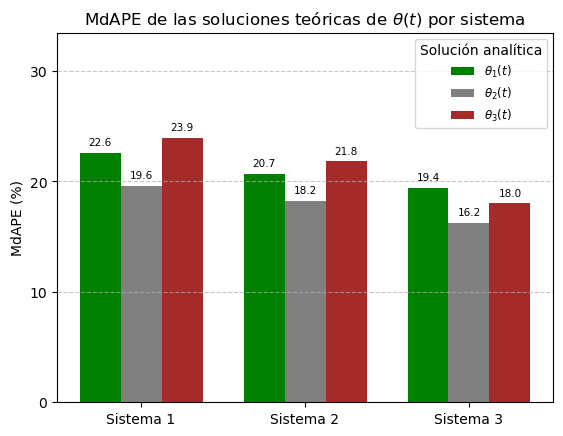

In [152]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(mean(theta1_mdape_system1)))
vec1.append("{:.3g}".format(mean(theta2_mdape_system1)))
vec1.append("{:.3g}".format(mean(theta3_mdape_system1)))

vec2.append("{:.3g}".format(mean(theta1_mdape_system2)))
vec2.append("{:.3g}".format(mean(theta2_mdape_system2)))
vec2.append("{:.3g}".format(mean(theta3_mdape_system2)))

vec3.append("{:.3g}".format(mean(theta1_mdape_system3)))
vec3.append("{:.3g}".format(mean(theta2_mdape_system3)))
vec3.append("{:.3g}".format(mean(theta3_mdape_system3)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_noML(vec, "theta", "MdAPE")

## $\phi(t)$

In [153]:
phi1_mdape_system1 = [48.6, 12.7, 12.5, 17.4, 24.8, 22.7, 14.8, 16.4, 37.3, 11.3, 35.3, 20.7, 5.09, 154, 11.8, 12.9, 40.1, 16.8]
phi2_mdape_system1 = [14.8, 14.4, 20.5, 13.9, 4.66, 8.32, 12.1, 31.5, 4.40, 21.6, 2.38, 4.79, 10.2, 55.4, 4.45, 17.6, 26.7, 30.8]
phi3_mdape_system1 = [15.4, 14.6, 17.3, 6.90, 101.7, 7.76]

phi1_mdape_system2 = [5.80, 23.3, 20.7, 25.1, 16.5, 28.4, 5.96, 19.0, 5.66, 15.2, 48.8, 6.44, 60.0, 38.2, 9.80, 14.5, 12.3, 7.93]
phi2_mdape_system2 = [7.77, 18.0, 8.35, 11.0, 20.3, 20.2, 11.9, 9.35, 5.76, 4.20, 3.36, 22.5, 8.79, 11.1, 4.19, 3.27, 0.872, 4.79]
phi3_mdape_system2 = [20.4, 13.8 , 3.38, 2.75, 24.3, 32.8, 23.2, 5.82]

phi1_mdape_system3 = [213, 21.6, 5.65, 11.5, 13.8, 42.1, 12.1, 15.0, 16.9, 1.94, 52.0, 3.11, 0.895, 22.5, 7.97, 16.9, 6.11, 44.5]
phi2_mdape_system3 = [20.7, 10.6, 12.3, 18.4, 10.8, 1.99, 6.62, 0.802, 1.48, 7.66, 3.68, 17.2, 2.47, 16.1, 0.927, 6.98, 6.42, 10.2]
phi3_mdape_system3 = [91.3, 15.7, 12.2, 18.7, 9.15, 6.72, 6.90, 1.41, 3.70, 11.4, 15.0]

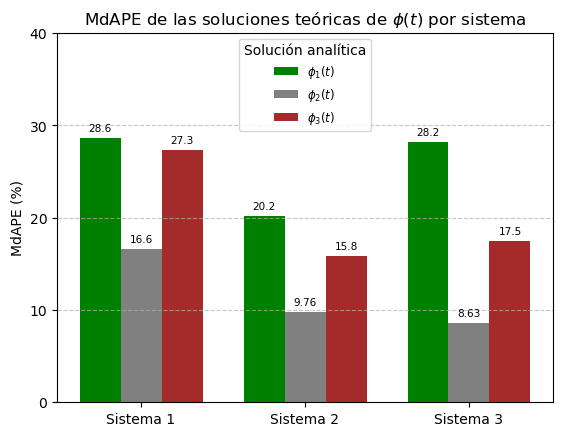

In [154]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(mean(phi1_mdape_system1)))
vec1.append("{:.3g}".format(mean(phi2_mdape_system1)))
vec1.append("{:.3g}".format(mean(phi3_mdape_system1)))

vec2.append("{:.3g}".format(mean(phi1_mdape_system2)))
vec2.append("{:.3g}".format(mean(phi2_mdape_system2)))
vec2.append("{:.3g}".format(mean(phi3_mdape_system2)))

vec3.append("{:.3g}".format(mean(phi1_mdape_system3)))
vec3.append("{:.3g}".format(mean(phi2_mdape_system3)))
vec3.append("{:.3g}".format(mean(phi3_mdape_system3)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_noML(vec, "phi", "MdAPE")

# **Gráficos de barras de $R^2$ (no ML;  por radio)**

In [155]:
# R1
R1_theta1_r2 = [23.9, 56.4, -19.1, 19.1, 87.2, 77.2, -42.7, 85.6, -430]
R1_theta2_r2 = [74.5, 62.4, 31.3, 35.5, 87.6, 86.7, 38.3, 83.6, -241]
R1_theta3_r2 = [91.5, 90.9, 13.6, 93.1]

# R2
R2_theta1_r2 = [65.8, 61.1, 88.4, 65.3, -135, -134, -283, 86.7, 47.4]
R2_theta2_r2 = [60.9, 84.7, 88.5, 83.7, 14.0, -5.67, 27.9, 82.9, 76.8]
R2_theta3_r2 = [64.8, 91.6, -34.0, -42.9, 86.7, 69.0]

# R3
R3_theta1_r2 = [-124, -33.1, -4.99, 15.6, 70.3, 57.8, 86.5, 82.5, 62.2]
R3_theta2_r2 = [-1.92, 38.4, 35.3, 63.2, 77.7, 58.1, 85.7, 80.3, 64.1]
R3_theta3_r2 = [89.0, 86.4, 70.1]

# R4
R4_theta1_r2 = [7.06, 18.6, 45.5, 33.7, -20.1, -172, -135, 28.6, -329]
R4_theta2_r2 = [57.7, 41.9, 63.1, 51.8, 14.7, 7.81, -21.0, 56.2, -77.5]
R4_theta3_r2 = [32.7, 60.2, -0.253]

# R5
R5_theta1_r2 = [14.5, 42.3, -5.53, 29.8, 30.0, -15.8, 62.4, 61.0, 45.3]
R5_theta2_r2 = [48.7, 55.3, 4.90, 51.2, 44.5, 15.4, 56.3, 62.0, 51.2]
R5_theta3_r2 = [49.0, 0.0543, 42.0, 38.1, 62.2, 49.8]

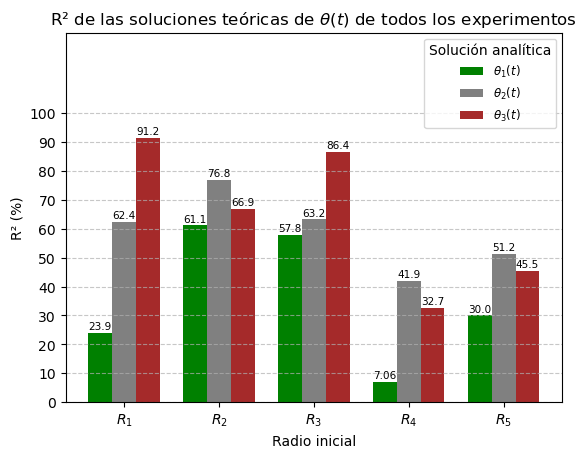

In [156]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(median(R1_theta1_r2)))
vec1.append("{:.3g}".format(median(R1_theta2_r2)))
vec1.append("{:.3g}".format(median(R1_theta3_r2)))

vec2.append("{:.3g}".format(median(R2_theta1_r2)))
vec2.append("{:.3g}".format(median(R2_theta2_r2)))
vec2.append("{:.3g}".format(median(R2_theta3_r2)))

vec3.append("{:.3g}".format(median(R3_theta1_r2)))
vec3.append("{:.3g}".format(median(R3_theta2_r2)))
vec3.append("{:.3g}".format(median(R3_theta3_r2)))

vec4.append("{:.3g}".format(median(R4_theta1_r2)))
vec4.append("{:.3g}".format(median(R4_theta2_r2)))
vec4.append("{:.3g}".format(median(R4_theta3_r2)))

vec5.append("{:.3g}".format(median(R5_theta1_r2)))
vec5.append("{:.3g}".format(median(R5_theta2_r2)))
vec5.append("{:.3g}".format(median(R5_theta3_r2)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)

bars_noML(vec, "theta", "R²")

# **Gráficos de barras de $R^2$ (no ML;  general)**

In [157]:
theta1_r2 = [23.9, 56.4, -19.1, 19.1, 87.2, 77.2, -42.7, 85.6, -430, 65.8, 61.1, 88.4, 65.3, -135, -134, -283, 86.7, 47.4, -124, -33.1, -4.99, 15.6, 70.3, 57.8, 86.5, 82.5, 62.2, 7.06, 18.6, 45.5, 33.7, -20.1, -172, -135, 28.6, -329, 14.5, 42.3, -5.53, 29.8, 30.0, -15.8, 62.4, 61.0, 45.3, 24.7, 79.6, -18.2, 57.9, 40.8, 80.4, 76.8, 1.56, -14.3]
theta2_r2 = [74.5, 62.4, 31.3, 35.5, 87.6, 86.7, 38.3, 83.6, -241, 60.9, 84.7, 88.5, 83.7, 14.0, -5.67, 27.9, 82.9, 76.8, -1.92, 38.4, 35.3, 63.2, 77.7, 58.1, 85.7, 80.3, 64.1, 57.7, 41.9, 63.1, 51.8, 14.7, 7.81, -21.0, 56.2, -77.5, 48.7, 55.3, 4.90, 51.2, 44.5, 15.4, 56.3, 62.0, 51.2, 49.0, 89.9, 53.5, 67.6, 50.2, 78.4, 84.5, 3.95, 39.5]
theta3_r2 = [91.5, 90.9, 13.6, 93.1, 64.8, 91.6, -34.0, -42.9, 86.7, 69.0, 89.0, 86.4, 70.1, 32.7, 60.2, -0.253, 49.0, 0.0543, 42.0, 38.1, 62.2, 49.8, 50.7, 85.1, 20.6]

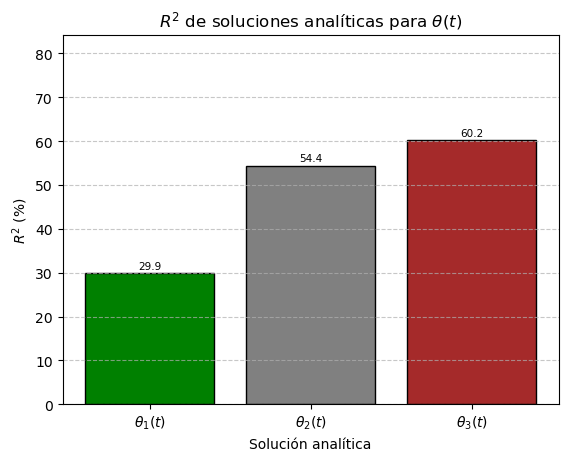

In [158]:
vec = []

vec.append("{:.3g}".format(median(theta1_r2)))
vec.append("{:.3g}".format(median(theta2_r2)))
vec.append("{:.3g}".format(median(theta3_r2)))

bars_r2_noML(vec[0], vec[1], vec[2])

# **Gráficos de barras de $R^2$ (no ML;  por sistema)**

In [159]:
theta1_r2_system1 = [23.9, 56.4, -19.1, 65.8, 61.1, 88.4, -124, -33.1, -4.99, 7.06, 18.6, 45.5, 14.5, 42.3, -5.53, 24.7, 79.6, -18.2]
theta2_r2_system1 = [74.5, 62.4, 31.3, 60.9, 84.7, 88.5, -1.92, 38.4, 35.3, 57.7, 41.9, 63.1, 48.7, 55.3, 4.90, 49.0, 89.9, 53.5]
theta3_r2_system1 = [64.8, 91.6, 32.7, 60.2, 49.0, 0.0543]

theta1_r2_system2 = [19.1, 87.2, 77.2, 65.3, -135, -134, 15.6, 70.3, 57.8, 33.7, -20.1, -172, 29.8, 30.0, -15.8, 57.9, 40.8, 80.4]
theta2_r2_system2 = [35.5, 87.6, 86.7, 83.7, 14.0, -5.67, 63.2, 77.7, 58.1, 51.8, 14.7, 7.81, 51.2, 44.5, 15.4, 67.6, 50.2, 78.4]
theta3_r2_system2 = [91.5, 90.9, -34.0, -42.9, -0.253, 42.0, 38.1, 50.7]

theta1_r2_system3 = [-42.7, 85.6, -430, -283, 86.7, 47.4, 86.5, 82.5, 62.2, -135, 28.6, -329, 62.4, 61.0, 45.3, 76.8, 1.56, -14.3]
theta2_r2_system3 = [38.3, 83.6, -241, 27.9, 82.9, 76.8, 85.7, 80.3, 64.1, -21.0, 56.2, -77.5, 56.3, 62.0, 51.2, 84.5, 3.95, 39.5]
theta3_r2_system3 = [13.6, 93.1, 86.7, 69.0, 89.0, 86.4, 70.1, 62.2, 49.8, 85.1, 20.6]

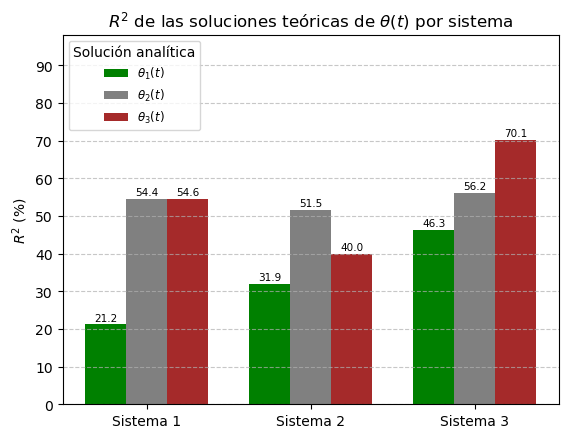

In [160]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(median(theta1_r2_system1)))
vec1.append("{:.3g}".format(median(theta2_r2_system1)))
vec1.append("{:.3g}".format(median(theta3_r2_system1)))

vec2.append("{:.3g}".format(median(theta1_r2_system2)))
vec2.append("{:.3g}".format(median(theta2_r2_system2)))
vec2.append("{:.3g}".format(median(theta3_r2_system2)))

vec3.append("{:.3g}".format(median(theta1_r2_system3)))
vec3.append("{:.3g}".format(median(theta2_r2_system3)))
vec3.append("{:.3g}".format(median(theta3_r2_system3)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_noML(vec, "theta", "R^2")

# **Gráficos de barras de MdAPE (ML;  general)**

## $\theta_1(t)$

### *Random Forest*

In [161]:
# Valores
mdapes1_1 = [31.1, 82.6, 41.5, 43.5, 59.6, 48.2, 75.8, 70.9, 32.6, 52.5, 35.2, 80.9, 48.1, 69.7, 49.2, 61.7, 60.3, 65.3, 61.6, 33.5, 62.8, 42.1, 37.5, 55.7, 47.5, 75.0, 77.6, 41.3, 55.0, 67.7, 33.0, 62.6, 30.8, 29.5, 63.4, 21.1, 27.8, 48.6, 65.1, 56.0, 64.1, 46.5, 56.4, 52.1, 61.3, 40.6, 45.5, 31.4, 39.3, 60.1, 76.8, 48.0, 45.8, 60.9]
mean1_1 = "{:.3g}".format(mean(mdapes1_1))

### *XG Boost*

In [162]:
# Valores
mdapes2_1 = [29.4, 45.0, 31.1, 33.4, 40.9, 48.3, 56.4, 61.1, 26.2, 57.0, 19.5, 60.8, 41.9, 55.2, 35.4, 59.1, 48.1, 54.4, 49.0, 21.8, 47.8, 35.2, 25.5, 46.6, 40.3, 59.7, 67.1, 27.6, 44.1, 56.9, 20.6, 32.9, 21.0, 27.0, 44.7, 15.6, 25.2, 40.1, 42.5, 47.3, 47.0, 39.5, 41.5, 45.3, 57.8, 27.7, 36.7, 23.0, 33.5, 46.4, 60.6, 35.9, 35.4, 49.1]
mean2_1 = "{:.3g}".format(mean(mdapes2_1))

### *Neural Networks*

In [163]:
# Valores
mdapes3_1 = [15.5, 76.3, 91.9, 105, 50.6, 47.7, 19.4, 43.9, 99.8, 40.4, 18.9, 49.2, 19.2, 73.1, 47.3, 92.3, 49.4, 41.6, 76.2, 33.5, 42.6, 104, 21.4, 38.6, 26.0, 27.3, 30.9, 71.6, 46.4, 84.6, 18.2, 20.8, 113, 89.0, 17.9, 90.0, 30.5, 35.6, 39.4, 21.0, 21.5, 65.6, 63.3, 19.1, 28.4, 109, 31.2, 65.0, 40.1, 32.9, 57.0, 22.9, 80.9, 27.7]
median1_1 = "{:.3g}".format(median(mdapes3_1))

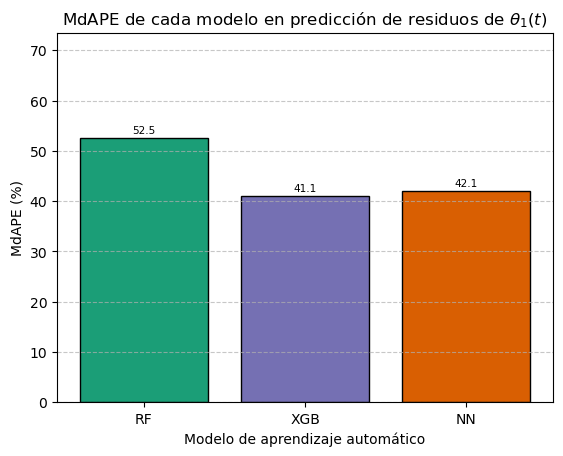

In [164]:
barsMdAPE_ML(mean1_1, mean2_1, median1_1, 1, "theta")

## $\phi_1(t)$

### *Random Forest*

In [165]:
# Valores
phi_mdapes1_1 = [4.42, 29.3, 46.5, 22.1, 13.8, 7.89, 25.6, 25.9, 41.4, 34.8, 8.26, 19.2, 9.20, 14.9, 11.6, 16.1, 23.2, 5.10, 8.87, 91.4, 1.80, 24.4, 11.9, 13.0, 17.5, 11.9, 12.2, 53.9, 14.6, 6.22, 1.44, 20.4, 51.2, 21.4, 15.3, 49.4, 33.9, 92.8, 10.2, 23.2, 18.9, 1.53, 3.92, 28.1, 5.36, 44.1, 36.6, 66.6, 10.2, 8.05, 12.4, 12.5, 23.2, 3.68]
phi_median1_1 = "{:.3g}".format(median(phi_mdapes1_1))

### *XG Boost*

In [166]:
# Valores
phi_mdapes2_1 = [6.70, 29.3, 45.4, 21.7, 12.6, 7.51, 15.0, 25.3, 41.7, 31.8, 6.61, 16.8, 7.71, 16.1, 14.8, 16.7, 22.7, 2.84, 10.4, 89.0, 2.07, 23.5, 9.83, 12.2, 14.1, 10.8, 10.7, 50.6, 8.62, 4.22, 2.25, 7.60, 50.1, 21.0, 5.96, 48.1, 31.5, 57.3, 6.58, 12.0, 11.5, 1.55, 3.58, 23.4, 3.20, 43.2, 32.4, 64.8, 8.41, 6.35, 12.2, 11.1, 22.2, 2.95]
phi_median2_1 = "{:.3g}".format(median(phi_mdapes2_1))

### *Neural Networks*

In [167]:
# Valores
phi_mdapes3_1 = [3.75, 23.7, 52.7, 22.8, 13.0, 6.44, 7.63, 25.6, 41.5, 35.5, 11.6, 18.0, 7.87, 12.0, 11.4, 13.3, 21.9, 1.87, 7.77, 97.0, 6.77, 26.3, 6.42, 13.2, 12.6, 14.9, 11.1, 57.7, 25.4, 12.5, 11.4, 12.0, 56.5, 22.2, 3.47, 53.5, 32.4, 58.1, 14.5, 8.11, 18.1, 5.31, 5.81, 28.5, 3.40, 42.1, 38.4, 82.2, 13.7, 5.54, 9.60, 10.5, 23.6, 4.05]
phi_median3_1 = "{:.3g}".format(median(phi_mdapes3_1))

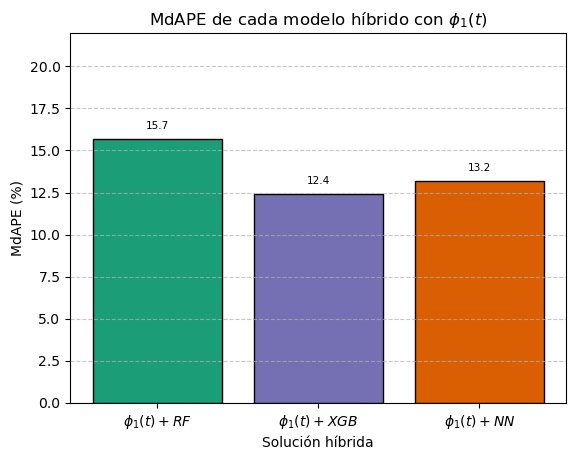

In [168]:
barsMdAPE_ML(phi_median1_1, phi_median2_1, phi_median3_1, 1, "phi")

## $\theta_2(t)$

### *Random Forest*

In [169]:
# Valores
mdapes1_2 = [62.9, 75.9, 41.9, 46.6, 70.2, 76.3, 56.7, 69.9, 34.0, 57.4, 58.0, 78.0, 77.5, 59.7, 48.1, 60.2, 58.3, 87.8, 48.1, 40.0, 55.5, 58.6, 54.0, 54.6, 44.0, 69.2, 82.7, 43.5, 56.7, 50.8, 45.9, 54.6, 39.6, 27.8, 57.7, 24.0, 36.6, 49.6, 60.7, 59.2, 60.4, 46.0, 61.4, 53.6, 75.0, 50.0, 71.0, 40.6, 67.6, 64.8, 71.5, 68.9, 48.5, 59.7]
mean1_2 = "{:.3g}".format(mean(mdapes1_2))

### *XG Boost*

In [170]:
# Valores
mdapes2_2 = [50.7, 49.3, 32.4, 36.7, 47.4, 57.8, 40.5, 53.7, 23.8, 56.8, 31.0, 69.2, 65.6, 41.9, 29.3, 52.4, 41.3, 64.4, 41.2, 25.8, 38.2, 36.9, 58.1, 48.6, 45.9, 49.5, 58.9, 31.9, 42.3, 37.7, 40.1, 32.6, 29.4, 27.3, 43.3, 17.7, 32.1, 34.6, 39.9, 45.0, 45.7, 34.7, 46.1, 39.2, 53.2, 36.0, 46.5, 31.8, 44.1, 51.7, 57.3, 47.3, 35.1, 58.7]
mean2_2 = "{:.3g}".format(mean(mdapes2_2))

### *Neural Networks*

In [171]:
# Valores
mdapes3_2 = [29.7, 74.9, 82.3, 98.2, 53.6, 55.0, 22.3, 53.8, 115, 40.4, 27.6, 52.6, 19.6, 76.8, 37.4, 80.3, 51.4, 43.8, 56.5, 55.1, 42.0, 84.9, 25.7, 66.0, 39.3, 36.3, 23.7, 45.3, 59.2, 62.1, 32.4, 26.0, 58.2, 67.7, 25.5, 46.0, 57.1, 29.1, 43.8, 23.5, 15.6, 68.5, 58.4, 17.2, 35.2, 94.2, 38.4, 79.0, 24.7, 31.3, 48.7, 27.8, 86.3, 31.7]
median1_2 = "{:.3g}".format(median(mdapes3_2))

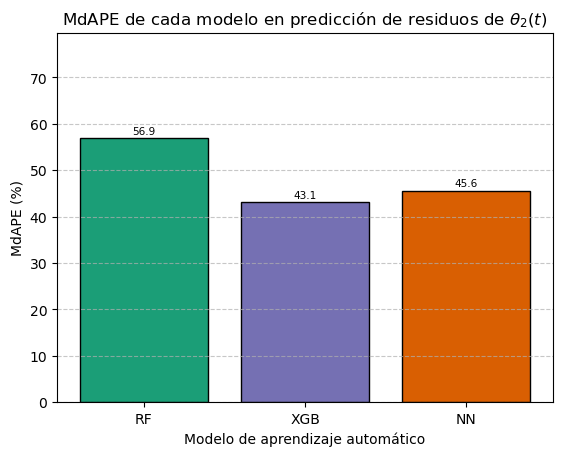

In [172]:
barsMdAPE_ML(mean1_2, mean2_2, median1_2, 2, "theta")

## $\phi_2(t)$

### *Random Forest*

In [4]:
# Valores
phi_mdapes1_2 = [21.0, 29.0, 44.4, 21.9, 14.6, 9.05, 6.00, 27.4, 40.6, 36.1, 13.4, 18.6, 12.1, 17.0, 15.9, 17.1, 23.7, 3.21, 11.3, 88.3, 1.88, 23.9, 14.3, 12.9, 18.7, 10.9, 11.2, 51.5, 11.3, 4.61, 3.57, 14.2, 48.9, 20.8, 10.3, 46.8, 33.2, 78.9, 9.39, 18.4, 16.1, 0.981, 4.23, 27.5, 4.72, 42.7, 40.1, 62.6, 12.8, 7.09, 12.2, 14.6, 23.2, 2.17]
phi_median1_2 = "{:.3g}".format(median(phi_mdapes1_2))

### *XG Boost*

In [5]:
# Valores
phi_mdapes2_2 = [9.29, 28.9, 43.3, 21.5, 13.1, 7.90, 4.79, 26.1, 41.2, 32.2, 6.68, 16.0, 9.48, 17.1, 16.1, 17.4, 22.7, 1.80, 11.6, 87.1, 3.19, 23.2, 10.6, 11.9, 14.2, 11.2, 10.2, 49.6, 7.19, 3.74, 1.41, 7.51, 48.8, 20.6, 5.96, 46.7, 31.9, 53.8, 6.48, 11.2, 11.2, 2.12, 3.88, 23.2, 3.16, 42.2, 33.3, 62.7, 8.69, 5.97, 11.8, 11.3, 22.1, 4.24]
phi_median2_2 = "{:.3g}".format(median(phi_mdapes2_2))

### *Neural Networks*

In [6]:
# Valores
phi_mdapes3_2 = [3.96, 34.1, 45.0, 22.3, 13.8, 11.1, 2.05, 24.8, 42.0, 58.2, 11.3, 18.9, 9.53, 19.4, 24.3, 17.9, 21.7, 0.806, 10.9, 87.2, 5.06, 23.7, 13.1, 15.2, 14.1, 12.6, 10.6, 45.0, 12.4, 6.79, 8.65, 21.6, 49.8, 21.8, 3.28, 49.1, 36.3, 45.5, 4.84, 6.20, 14.8, 4.77, 5.95, 15.0, 2.08, 42.9, 32.0, 65.2, 10.9, 8.88, 12.6, 11.8, 24.1, 9.78]
phi_median3_2 = "{:.3g}".format(median(phi_mdapes3_2))

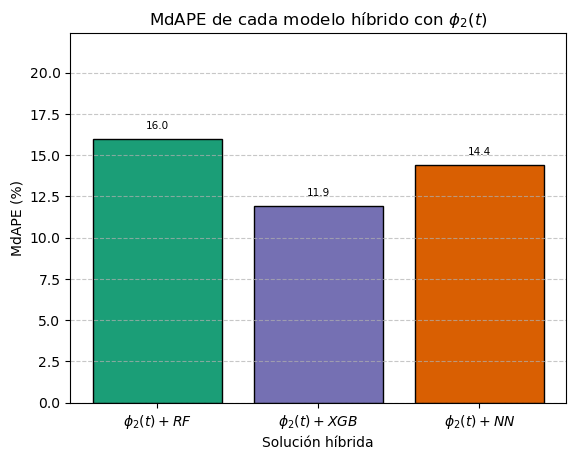

In [7]:
barsMdAPE_ML(phi_median1_2, phi_median2_2, phi_median3_2, 2, "phi")

## $\theta_3(t)$

### *Random Forest*

In [177]:
# Valores
mdapes1_3 = [70.1, 76.2, 68.3, 78.2, 58.3, 85.4, 73.8, 53.0, 57.9, 72.1, 43.5, 75.4, 87.2, 57.9, 61.3, 60.7, 51.3, 65.2, 56.4, 54.1, 56.8, 65.7, 67.7, 61.0, 63.3]
mean1_3 = "{:.3g}".format(mean(mdapes1_3))

### *XG Boost*

In [178]:
mdapes2_3 = [43.0, 69.3, 52.0, 70.7, 52.5, 73.7, 57.3, 38.5, 45.8, 61.9, 53.8, 58.2, 71.3, 43.0, 57.2, 33.3, 40.9, 40.3, 41.5, 49.7, 44.2, 49.3, 47.6, 53.7, 53.1]
mean2_3 = "{:.3g}".format(mean(mdapes2_3))

### *Neural Networks*

In [179]:
mdapes3_3 = [37.3, 46.2, 37.2, 48.1, 35.3, 52.7, 94.2, 30.9, 53.9, 35.3, 31.1, 32.2, 29.2, 60.1, 75.2, 26.7, 27.2, 34.5, 27.9, 19.0, 48.4, 28.0, 42.2, 26.9, 22.2]
median1_3 = "{:.3g}".format(median(mdapes3_3))

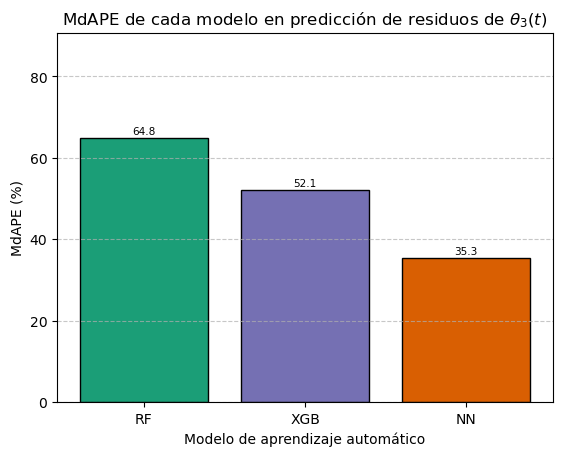

In [180]:
barsMdAPE_ML(mean1_3, mean2_3, median1_3, 3, "theta")

## $\phi_3(t)$

In [181]:
# Valores
phi_mdapes1_3 = [14.2, 8.37, 35.1, 26.7, 35.5, 19.4, 15.2, 12.2, 23.4, 6.37, 17.6, 11.4, 12.4, 13.3, 6.55, 20.6, 96.0, 9.58, 22.9, 18.9, 4.03, 5.09, 7.74, 13.9, 4.18]
phi_median1_3 = "{:.3g}".format(median(phi_mdapes1_3))

In [182]:
# Valores
phi_mdapes2_3 = [12.7, 7.98, 12.6, 25.7, 32.2, 17.0, 16.4, 15.4, 22.7, 3.65, 14.2, 10.7, 10.4, 8.44, 4.96, 8.98, 51.3, 6.87, 11.6, 11.2, 3.68, 3.16, 6.13, 11.1, 2.23]
phi_median2_3 = "{:.3g}".format(median(phi_mdapes2_3))

In [183]:
# Valores
phi_mdapes3_3 = [10.3, 5.38, 60.8, 22.9, 28.9, 23.2, 13.0, 15.3, 20.7, 1.21, 16.0, 9.28, 12.0, 17.6, 9.39, 14.9, 11.7, 5.80, 22.4, 17.4, 5.35, 5.56, 7.12, 7.82, 6.58]
phi_median3_3 = "{:.3g}".format(median(phi_mdapes3_3))

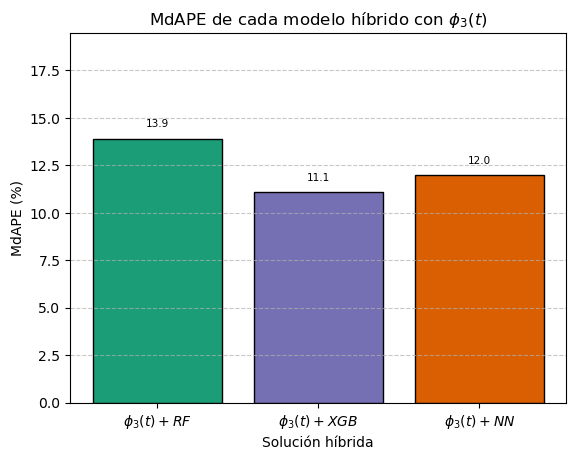

In [184]:
barsMdAPE_ML(phi_median1_3, phi_median2_3, phi_median3_3, 3, "phi")

# **Gráficos de barras de MdAPE (ML;  por radio)**

## $\theta_1(t)$

### *Random Forest*

In [185]:
R1_RFtheta1_mdape = [31.1, 82.6, 41.5, 43.5, 59.6, 48.2, 75.8, 70.9, 32.6]
R2_RFtheta1_mdape = [52.5, 35.2, 80.9, 48.1, 69.7, 49.2, 61.7, 60.3, 65.3]
R3_RFtheta1_mdape = [61.6, 33.5, 62.8, 42.1, 37.5, 55.7, 47.5, 75.0, 77.6]
R4_RFtheta1_mdape = [41.3, 55.0, 67.7, 33.0, 62.6, 30.8, 29.5, 63.4, 21.1]
R5_RFtheta1_mdape = [27.8, 48.6, 65.1, 56.0, 64.1, 46.5, 56.4, 52.1, 61.3]

### *XG Boost*

In [186]:
R1_XGBtheta1_mdape = [29.4, 45.0, 31.1, 33.4, 40.9, 48.3, 56.4, 61.1, 26.2]
R2_XGBtheta1_mdape = [57.0, 19.5, 60.8, 41.9, 55.2, 35.4, 59.1, 48.1, 54.4]
R3_XGBtheta1_mdape = [49.0, 21.8, 47.8, 35.2, 25.5, 46.6, 40.3, 59.7, 67.1]
R4_XGBtheta1_mdape = [27.6, 44.1, 56.9, 20.6, 32.9, 21.0, 27.0, 44.7, 15.6]
R5_XGBtheta1_mdape = [25.2, 40.1, 42.5, 47.3, 47.0, 39.5, 41.5, 45.3, 57.8]

### *Neural Networks*

In [187]:
R1_NNtheta1_mdape = [15.5, 76.3, 91.9, 105, 50.6, 47.7, 19.4, 43.9, 99.8]
R2_NNtheta1_mdape = [40.4, 18.9, 49.2, 19.2, 73.1, 47.3, 92.3, 49.4, 41.6]
R3_NNtheta1_mdape = [76.2, 33.5, 42.6, 104, 21.4, 38.6, 26.0, 27.3, 30.9]
R4_NNtheta1_mdape = [71.6, 46.4, 84.6, 18.2, 20.8, 113, 89.0, 17.9, 90.0]
R5_NNtheta1_mdape = [30.5, 35.6, 39.4, 21.0, 21.5, 65.6, 63.3, 19.1, 28.4]

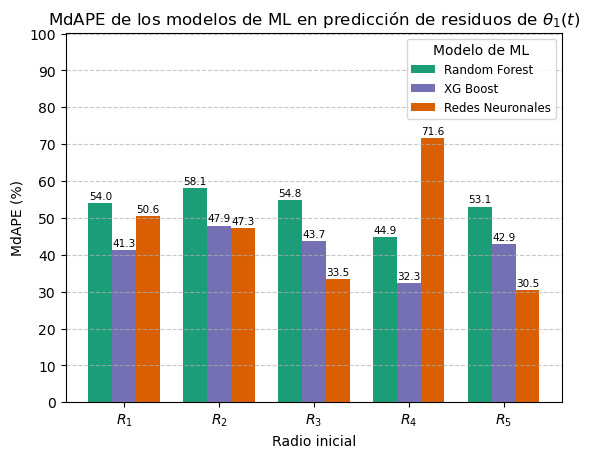

In [ ]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(mean(R1_RFtheta1_mdape)))
vec1.append("{:.3g}".format(mean(R1_XGBtheta1_mdape)))
vec1.append("{:.3g}".format(median(R1_NNtheta1_mdape)))

vec2.append("{:.3g}".format(mean(R2_RFtheta1_mdape)))
vec2.append("{:.3g}".format(mean(R2_XGBtheta1_mdape)))
vec2.append("{:.3g}".format(median(R2_NNtheta1_mdape)))

#CORREGIR
vec3.append("{:.3g}".format(mean(R3_RFtheta1_mdape)))
vec3.append("{:.3g}".format(mean(R3_XGBtheta1_mdape)))
vec3.append("{:.3g}".format(median(R3_NNtheta1_mdape)))

vec4.append("{:.3g}".format(mean(R4_RFtheta1_mdape)))
vec4.append("{:.3g}".format(mean(R4_XGBtheta1_mdape)))
vec4.append("{:.3g}".format(median(R4_NNtheta1_mdape)))

vec5.append("{:.3g}".format(mean(R5_RFtheta1_mdape)))
vec5.append("{:.3g}".format(mean(R5_XGBtheta1_mdape)))
vec5.append("{:.3g}".format(median(R5_NNtheta1_mdape)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)


barsMdAPE_ML_radius(vec, "theta1")

## $\phi_1(t)$

### *Random Forest*

In [189]:
R1_RFphi1_mdape = [4.42, 29.3, 46.5, 22.1, 13.8, 7.89, 25.6, 25.9, 41.4]
R2_RFphi1_mdape = [34.8, 8.26, 19.2, 9.20, 14.9, 11.6, 16.1, 23.2, 5.10]
R3_RFphi1_mdape = [8.87, 91.4, 1.80, 24.4, 11.9, 13.0, 17.5, 11.9, 12.2]
R4_RFphi1_mdape = [53.9, 14.6, 6.22, 1.44, 20.4, 51.2, 21.4, 15.3, 49.4]
R5_RFphi1_mdape = [33.9, 92.8, 10.2, 23.2, 18.9, 1.53, 3.92, 28.1, 5.36]

### *XG Boost*

In [190]:
R1_XGBphi1_mdape = [6.70, 29.3, 45.4, 21.7, 12.6, 7.51, 15.0, 25.3, 41.7]
R2_XGBphi1_mdape = [31.8, 6.61, 16.8, 7.71, 16.1, 14.8, 16.7, 22.7, 2.84]
R3_XGBphi1_mdape = [10.4, 89.0, 2.07, 23.5, 9.83, 12.2, 14.1, 10.8, 10.7]
R4_XGBphi1_mdape = [50.6, 8.62, 4.22, 2.25, 7.60, 50.1, 21.0, 5.96, 48.1]
R5_XGBphi1_mdape = [31.5, 57.3, 6.58, 12.0, 11.5, 1.55, 3.58, 23.4, 3.20]

### *Neural Networks*

In [191]:
R1_NNphi1_mdape = [3.75, 23.7, 52.7, 22.8, 13.0, 6.44, 7.63, 25.6, 41.5]
R2_NNphi1_mdape = [35.5, 11.6, 18.0, 7.87, 12.0, 11.4, 13.3, 21.9, 1.87]
R3_NNphi1_mdape = [7.77, 97.0, 6.77, 26.3, 6.42, 13.2, 12.6, 14.9, 11.1]
R4_NNphi1_mdape = [57.7, 25.4, 12.5, 11.4, 12.0, 56.5, 22.2, 3.47, 53.5]
R5_NNphi1_mdape = [32.4, 58.1, 14.5, 8.11, 18.1, 5.31, 5.81, 28.5, 3.40]

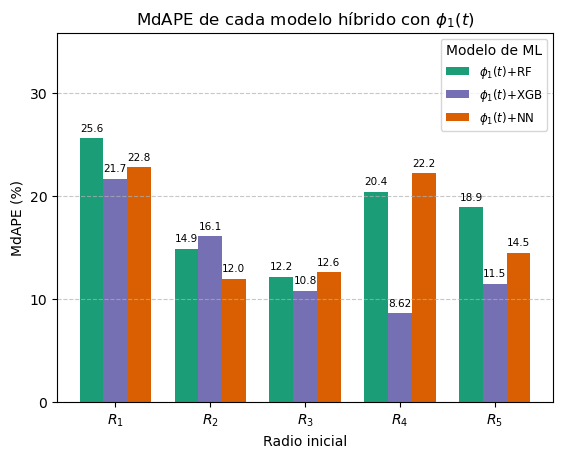

In [192]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(median(R1_RFphi1_mdape)))
vec1.append("{:.3g}".format(median(R1_XGBphi1_mdape)))
vec1.append("{:.3g}".format(median(R1_NNphi1_mdape)))

vec2.append("{:.3g}".format(median(R2_RFphi1_mdape)))
vec2.append("{:.3g}".format(median(R2_XGBphi1_mdape)))
vec2.append("{:.3g}".format(median(R2_NNphi1_mdape)))

vec3.append("{:.3g}".format(median(R3_RFphi1_mdape)))
vec3.append("{:.3g}".format(median(R3_XGBphi1_mdape)))
vec3.append("{:.3g}".format(median(R3_NNphi1_mdape)))

vec4.append("{:.3g}".format(median(R4_RFphi1_mdape)))
vec4.append("{:.3g}".format(median(R4_XGBphi1_mdape)))
vec4.append("{:.3g}".format(median(R4_NNphi1_mdape)))

vec5.append("{:.3g}".format(median(R5_RFphi1_mdape)))
vec5.append("{:.3g}".format(median(R5_XGBphi1_mdape)))
vec5.append("{:.3g}".format(median(R5_NNphi1_mdape)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)


barsMdAPE_ML_radius(vec, "phi1")

## $\theta_2(t)$

### *Random Forest*

In [193]:
R1_RFtheta2_mdape = [62.9, 75.9, 41.9, 46.6, 70.2, 76.3, 56.7, 69.9, 34.0]
R2_RFtheta2_mdape = [57.4, 58.0, 78.0, 77.5, 59.7, 48.1, 60.2, 58.3, 87.8]
R3_RFtheta2_mdape = [48.1, 40.0, 55.5, 58.6, 54.0, 54.6, 44.0, 69.2, 82.7]
R4_RFtheta2_mdape = [43.5, 56.7, 50.8, 45.9, 54.6, 39.6, 27.8, 57.7, 24.0]
R5_RFtheta2_mdape = [36.6, 49.6, 60.7, 59.2, 60.4, 46.0, 61.4, 53.6, 75.0]

### *XG Boost*

In [194]:
R1_XGBtheta2_mdape = [50.7, 49.3, 32.4, 36.7, 47.4, 57.8, 40.5, 53.7, 23.8]
R2_XGBtheta2_mdape = [56.8, 31.0, 69.2, 65.6, 41.9, 29.3, 52.4, 41.3, 64.4]
R3_XGBtheta2_mdape = [41.2, 25.8, 38.2, 36.9, 58.1, 48.6, 45.9, 49.5, 58.9]
R4_XGBtheta2_mdape = [31.9, 42.3, 37.7, 40.1, 32.6, 29.4, 27.3, 43.3, 17.7]
R5_XGBtheta2_mdape = [32.1, 34.6, 39.9, 45.0, 45.7, 34.7, 46.1, 39.2, 53.2]

### *Neural Networks*

In [195]:
R1_NNtheta2_mdape = [29.7, 74.9, 82.3, 98.2, 53.6, 55.0, 22.3, 53.8, 115]
R2_NNtheta2_mdape = [40.4, 27.6, 52.6, 19.6, 76.8, 37.4, 80.3, 51.4, 43.8]
R3_NNtheta2_mdape = [56.5, 55.1, 42.0, 84.9, 25.7, 66.0, 39.3, 36.3, 23.7]
R4_NNtheta2_mdape = [45.3, 59.2, 62.1, 32.4, 26.0, 58.2, 67.7, 25.5, 46.0]
R5_NNtheta2_mdape = [57.1, 29.1, 43.8, 23.5, 15.6, 68.5, 58.4, 17.2, 35.2]

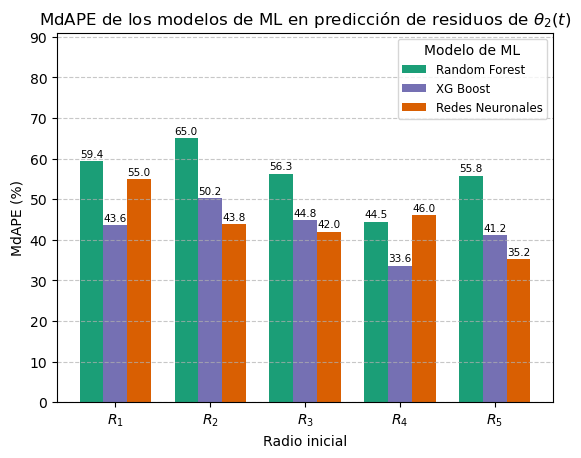

In [196]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(mean(R1_RFtheta2_mdape)))
vec1.append("{:.3g}".format(mean(R1_XGBtheta2_mdape)))
vec1.append("{:.3g}".format(median(R1_NNtheta2_mdape)))

vec2.append("{:.3g}".format(mean(R2_RFtheta2_mdape)))
vec2.append("{:.3g}".format(mean(R2_XGBtheta2_mdape)))
vec2.append("{:.3g}".format(median(R2_NNtheta2_mdape)))

#CORREGIR
vec3.append("{:.3g}".format(mean(R3_RFtheta2_mdape)))
vec3.append("{:.3g}".format(mean(R3_XGBtheta2_mdape)))
vec3.append("{:.3g}".format(median(R3_NNtheta2_mdape)))

vec4.append("{:.3g}".format(mean(R4_RFtheta2_mdape)))
vec4.append("{:.3g}".format(mean(R4_XGBtheta2_mdape)))
vec4.append("{:.3g}".format(median(R4_NNtheta2_mdape)))

vec5.append("{:.3g}".format(mean(R5_RFtheta2_mdape)))
vec5.append("{:.3g}".format(mean(R5_XGBtheta2_mdape)))
vec5.append("{:.3g}".format(median(R5_NNtheta2_mdape)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)

barsMdAPE_ML_radius(vec, "theta2")

## $\phi_2(t)$

### *Random Forest*

In [197]:
R1_RFphi2_mdape = [21.0, 29.0, 44.4, 21.9, 14.6, 9.05, 6.00, 27.4, 40.6]
R2_RFphi2_mdape = [36.1, 13.4, 18.6, 12.1, 17.0, 15.9, 17.1, 23.7, 3.21]
R3_RFphi2_mdape = [11.3, 88.3, 1.88, 23.9, 14.3, 12.9, 18.7, 10.9, 11.2]
R4_RFphi2_mdape = [51.5, 11.3, 4.61, 3.57, 14.2, 48.9, 20.8, 10.3, 46.8]
R5_RFphi2_mdape = [33.2, 78.9, 9.39, 18.4, 16.1, 0.981, 4.23, 27.5, 4.72]

### *XG Boost*

In [198]:
R1_XGBphi2_mdape = [9.29, 28.9, 43.3, 21.5, 13.1, 7.90, 4.79, 26.1, 41.2]
R2_XGBphi2_mdape = [32.2, 6.68, 16.0, 9.48, 17.1, 16.1, 17.4, 22.7, 1.80]
R3_XGBphi2_mdape = [11.6, 87.1, 3.19, 23.2, 10.6, 11.9, 14.2, 11.2, 10.2]
R4_XGBphi2_mdape = [49.6, 7.19, 3.74, 1.41, 7.51, 48.8, 20.6, 5.96, 46.7]
R5_XGBphi2_mdape = [31.9, 53.8, 6.48, 11.2, 11.2, 2.12, 3.88, 23.2, 3.16]

### *Neural Networks*

In [199]:
R1_NNphi2_mdape = [3.96, 34.1, 45.0, 22.3, 13.8, 11.1, 2.05, 24.8, 42.0]
R2_NNphi2_mdape = [58.2, 11.3, 18.9, 9.53, 19.4, 24.3, 17.9, 21.7, 0.806]
R3_NNphi2_mdape = [10.9, 87.2, 5.06, 23.7, 13.1, 15.2, 14.1, 12.6, 10.6]
R4_NNphi2_mdape = [45.0, 12.4, 6.79, 8.65, 21.6, 49.8, 21.8, 3.28, 49.1]
R5_NNphi2_mdape = [36.3, 45.5, 4.84, 6.20, 14.8, 4.77, 5.95, 15.0, 2.08]

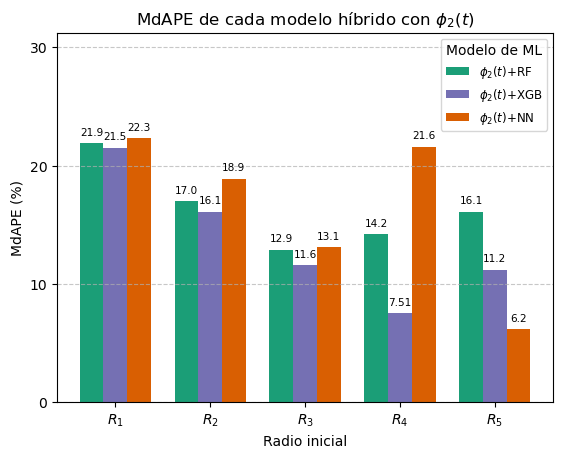

In [200]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(median(R1_RFphi2_mdape)))
vec1.append("{:.3g}".format(median(R1_XGBphi2_mdape)))
vec1.append("{:.3g}".format(median(R1_NNphi2_mdape)))

vec2.append("{:.3g}".format(median(R2_RFphi2_mdape)))
vec2.append("{:.3g}".format(median(R2_XGBphi2_mdape)))
vec2.append("{:.3g}".format(median(R2_NNphi2_mdape)))

vec3.append("{:.3g}".format(median(R3_RFphi2_mdape)))
vec3.append("{:.3g}".format(median(R3_XGBphi2_mdape)))
vec3.append("{:.3g}".format(median(R3_NNphi2_mdape)))

vec4.append("{:.3g}".format(median(R4_RFphi2_mdape)))
vec4.append("{:.3g}".format(median(R4_XGBphi2_mdape)))
vec4.append("{:.3g}".format(median(R4_NNphi2_mdape)))

vec5.append("{:.3g}".format(median(R5_RFphi2_mdape)))
vec5.append("{:.3g}".format(median(R5_XGBphi2_mdape)))
vec5.append("{:.3g}".format(median(R5_NNphi2_mdape)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)


barsMdAPE_ML_radius(vec, "phi2")

## $\theta_3(t)$

### *Random Forest*

In [201]:
R1_RFtheta3_mdape = [70.1, 76.2, 68.3, 78.2]
R2_RFtheta3_mdape = [-58.3, 85.4, 73.8, 53.0, 57.9, 72.1]
R3_RFtheta3_mdape = [43.5, 75.4, 87.2]
R4_RFtheta3_mdape = [57.9, 61.3, 60.7]
R5_RFtheta3_mdape = [51.3, 65.2, 56.4, 54.1, 56.8, 65.7]

### *XG Boost*

In [202]:
R1_XGBtheta3_mdape = [43.0, 69.3, 52.0, 70.7]
R2_XGBtheta3_mdape = [52.5, 73.7, 57.3, 38.5, 45.8, 61.9]
R3_XGBtheta3_mdape = [53.8, 58.2, 71.3]
R4_XGBtheta3_mdape = [43.0, 57.2, 33.3]
R5_XGBtheta3_mdape = [40.9, 40.3, 41.5, 49.7, 44.2, 49.3]

### *Neural Networks*

In [203]:
R1_NNtheta3_mdape = [37.3, 46.2, 37.2, 48.1]
R2_NNtheta3_mdape = [35.3, 52.7, 94.2, 30.9, 53.9, 35.3]
R3_NNtheta3_mdape = [31.1, 32.2, 29.2]
R4_NNtheta3_mdape = [60.1, 75.2, 26.7]
R5_NNtheta3_mdape = [27.2, 34.5, 27.9, 19.0, 48.4, 28.0]

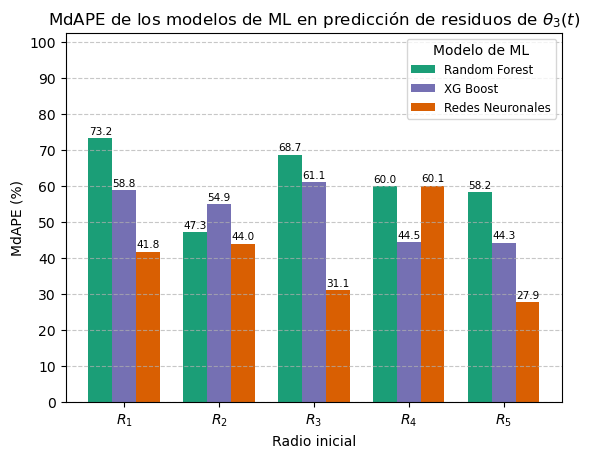

In [204]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(mean(R1_RFtheta3_mdape)))
vec1.append("{:.3g}".format(mean(R1_XGBtheta3_mdape)))
vec1.append("{:.3g}".format(median(R1_NNtheta3_mdape)))

vec2.append("{:.3g}".format(mean(R2_RFtheta3_mdape)))
vec2.append("{:.3g}".format(mean(R2_XGBtheta3_mdape)))
vec2.append("{:.3g}".format(median(R2_NNtheta3_mdape)))

#CORREGIR
vec3.append("{:.3g}".format(mean(R3_RFtheta3_mdape)))
vec3.append("{:.3g}".format(mean(R3_XGBtheta3_mdape)))
vec3.append("{:.3g}".format(median(R3_NNtheta3_mdape)))

vec4.append("{:.3g}".format(mean(R4_RFtheta3_mdape)))
vec4.append("{:.3g}".format(mean(R4_XGBtheta3_mdape)))
vec4.append("{:.3g}".format(median(R4_NNtheta3_mdape)))

vec5.append("{:.3g}".format(mean(R5_RFtheta3_mdape)))
vec5.append("{:.3g}".format(mean(R5_XGBtheta3_mdape)))
vec5.append("{:.3g}".format(median(R5_NNtheta3_mdape)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)

barsMdAPE_ML_radius(vec, "theta3")

## $\phi_3(t)$

### *Random Forest*

In [205]:
R1_RFphi3_mdape = [14.2, 8.37, 35.1, 26.7]
R2_RFphi3_mdape = [35.5, 19.4, 15.2, 12.2, 23.4, 6.37]
R3_RFphi3_mdape = [17.6, 11.4, 12.4]
R4_RFphi3_mdape = [13.3, 6.55, 20.6]
R5_RFphi3_mdape = [96.0, 9.58, 22.9, 18.9, 4.03, 5.09]

### *XG Boost*

In [206]:
R1_XGBphi3_mdape = [12.7, 7.98, 12.6, 25.7]
R2_XGBphi3_mdape = [32.2, 17.0, 16.4, 15.4, 22.7, 3.65]
R3_XGBphi3_mdape = [14.2, 10.7, 10.4]
R4_XGBphi3_mdape = [8.44, 4.96, 8.98]
R5_XGBphi3_mdape = [51.3, 6.87, 11.6, 11.2, 3.68, 3.16]

### *Neural Networks*

In [207]:
R1_NNphi3_mdape = [10.3, 5.38, 60.8, 22.9]
R2_NNphi3_mdape = [28.9, 23.2, 13.0, 15.3, 20.7, 1.21]
R3_NNphi3_mdape = [16.0, 9.28, 12.0]
R4_NNphi3_mdape = [17.6, 9.39, 14.9]
R5_NNphi3_mdape = [11.7, 5.80, 22.4, 17.4, 5.35, 5.56]

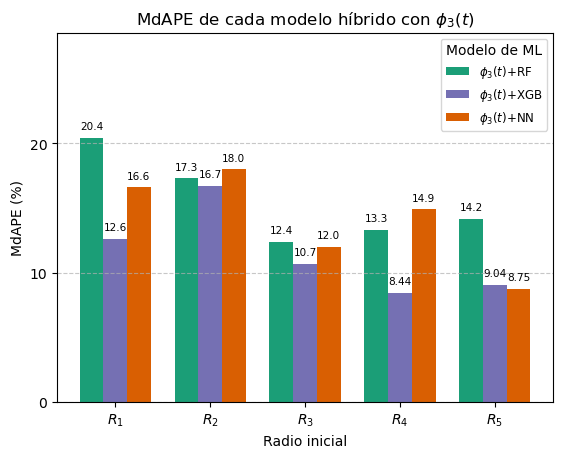

In [208]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(median(R1_RFphi3_mdape)))
vec1.append("{:.3g}".format(median(R1_XGBphi3_mdape)))
vec1.append("{:.3g}".format(median(R1_NNphi3_mdape)))

vec2.append("{:.3g}".format(median(R2_RFphi3_mdape)))
vec2.append("{:.3g}".format(median(R2_XGBphi3_mdape)))
vec2.append("{:.3g}".format(median(R2_NNphi3_mdape)))

vec3.append("{:.3g}".format(median(R3_RFphi3_mdape)))
vec3.append("{:.3g}".format(median(R3_XGBphi3_mdape)))
vec3.append("{:.3g}".format(median(R3_NNphi3_mdape)))

vec4.append("{:.3g}".format(median(R4_RFphi3_mdape)))
vec4.append("{:.3g}".format(median(R4_XGBphi3_mdape)))
vec4.append("{:.3g}".format(median(R4_NNphi3_mdape)))

vec5.append("{:.3g}".format(median(R5_RFphi3_mdape)))
vec5.append("{:.3g}".format(median(R5_XGBphi3_mdape)))
vec5.append("{:.3g}".format(median(R5_NNphi3_mdape)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)


barsMdAPE_ML_radius(vec, "phi3")

# **Gráficos de barras de MdAPE (ML;  por sistema)**

## $\theta_1(t)$

In [209]:
theta1_S1RF_mdape = [31.1, 82.6, 41.5, 52.5, 35.2, 80.9, 61.6, 33.5, 62.8, 41.3, 55.0, 67.7, 27.8, 48.6, 65.1, 40.6, 45.5, 31.4]
theta1_S1XGB_mdape = [29.4, 45.0, 31.1, 57.0, 19.5, 60.8, 49.0, 21.8, 47.8, 27.6, 44.1, 56.9, 25.2, 40.1, 42.5, 27.7, 36.7, 23.0]
theta1_S1NN_mdape = [16.3, 80.1, 94.3, 40.4, 18.9, 49.2, 76.2, 33.5, 42.6, 71.6, 46.4, 84.6, 30.5, 35.6, 39.4, 109, 31.2, 65.0]

theta1_S2RF_mdape = [43.5, 59.6, 48.2, 48.1, 69.7, 49.2, 42.1, 37.5, 55.7, 33.0, 62.6, 30.8, 56.0, 64.1, 46.5, 39.3, 60.1, 76.8]
theta1_S2XGB_mdape = [33.4, 40.9, 48.3, 41.9, 55.2, 35.4, 35.2, 25.5, 46.6, 20.6, 32.9, 21.0, 47.3, 47.0, 39.5, 33.5, 46.4, 60.6]
theta1_S2NN_mdape = [105, 50.6, 47.7, 19.2, 73.1, 47.3, 104, 21.4, 38.6, 18.2, 20.8, 113, 21.0, 21.5, 65.6, 40.1, 32.9, 57.0]

theta1_S3RF_mdape = [75.8, 70.9, 32.6, 61.7, 60.3, 65.3, 47.5, 75.0, 77.6, 29.5, 63.4, 21.1, 56.4, 52.1, 61.3, 48.0, 45.8, 60.9]
theta1_S3XGB_mdape = [56.4, 61.1, 26.2, 59.1, 48.1, 54.4, 40.3, 59.7, 67.1, 27.0, 44.7, 15.6, 41.5, 45.3, 57.8, 35.9, 35.4, 49.1]
theta1_S3NN_mdape = [19.4, 43.9, 99.8, 92.3, 49.4, 41.6, 26.0, 27.3, 30.9, 89.0, 17.9, 90.0, 63.3, 19.1, 28.4, 22.9, 80.9, 27.7]

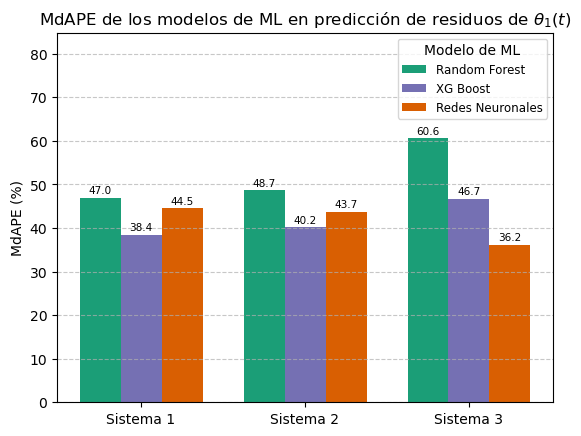

In [210]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(median(theta1_S1RF_mdape)))
vec1.append("{:.3g}".format(median(theta1_S1XGB_mdape)))
vec1.append("{:.3g}".format(median(theta1_S1NN_mdape)))

vec2.append("{:.3g}".format(median(theta1_S2RF_mdape)))
vec2.append("{:.3g}".format(median(theta1_S2XGB_mdape)))
vec2.append("{:.3g}".format(median(theta1_S2NN_mdape)))

vec3.append("{:.3g}".format(median(theta1_S3RF_mdape)))
vec3.append("{:.3g}".format(median(theta1_S3XGB_mdape)))
vec3.append("{:.3g}".format(median(theta1_S3NN_mdape)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_ML(vec, "theta1", "MdAPE")

## $\phi_1(t)$

In [211]:
phi1_S1RF_mdape = [4.42, 29.3, 46.5, 34.8, 8.26, 19.2, 8.87, 91.4, 1.80, 53.9, 14.6, 6.22, 33.9, 92.8, 10.2, 44.1, 36.6, 66.6]
phi1_S1XGB_mdape = [6.70, 29.3, 45.4, 31.8, 6.61, 16.8, 10.4, 89.0, 2.07, 50.6, 8.62, 4.22, 31.5, 57.3, 6.58, 43.2, 32.4, 64.8]
phi1_S1NN_mdape = [3.75, 23.7, 52.7, 35.5, 11.6, 18.0, 7.77, 97.0, 6.77, 57.7, 25.4, 12.5, 32.4, 58.1, 14.5, 42.1, 38.4, 82.2]

phi1_S2RF_mdape = [22.1, 13.8, 7.89, 9.20, 14.9, 11.6, 24.4, 11.9, 13.0, 1.44, 20.4, 51.2, 23.2, 18.9, 1.53, 10.2, 8.05, 12.4]
phi1_S2XGB_mdape = [21.7, 12.6, 7.51, 7.71, 16.1, 14.8, 23.5, 9.83, 12.2, 2.25, 7.60, 50.1, 12.0, 11.5, 1.55, 8.41, 6.35, 12.2]
phi1_S2NN_mdape = [22.8, 13.0, 6.44, 7.87, 12.0, 11.4, 26.3, 6.42, 13.2, 11.4, 12.0, 56.5, 8.11, 18.1, 5.31, 13.7, 5.54, 9.60]

phi1_S3RF_mdape = [25.6, 25.9, 41.4, 16.1, 23.2, 5.10, 17.5, 11.9, 12.2, 21.4, 15.3, 49.4, 3.92, 28.1, 5.36, 12.5, 23.2, 3.68]
phi1_S3XGB_mdape = [15.0, 25.3, 41.7, 16.7, 22.7, 2.84, 14.1, 10.8, 10.7, 21.0, 5.96, 48.1, 3.58, 23.4, 3.20, 11.1, 22.2, 2.95]
phi1_S3NN_mdape = [7.63, 25.6, 41.5, 13.3, 21.9, 1.87, 12.6, 14.9, 11.1, 22.2, 3.47, 53.5, 5.81, 28.5, 3.40, 10.5, 23.6, 4.05]

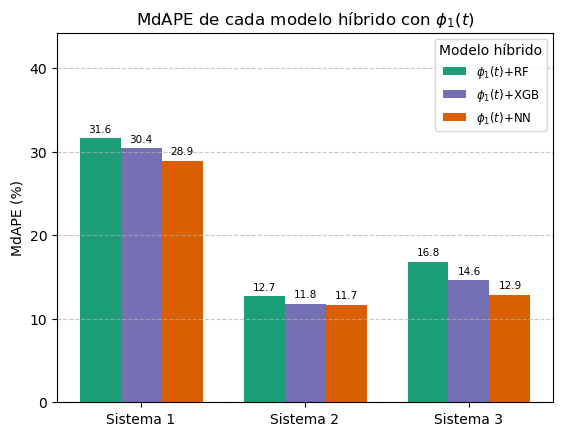

In [212]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(median(phi1_S1RF_mdape)))
vec1.append("{:.3g}".format(median(phi1_S1XGB_mdape)))
vec1.append("{:.3g}".format(median(phi1_S1NN_mdape)))

vec2.append("{:.3g}".format(median(phi1_S2RF_mdape)))
vec2.append("{:.3g}".format(median(phi1_S2XGB_mdape)))
vec2.append("{:.3g}".format(median(phi1_S2NN_mdape)))

vec3.append("{:.3g}".format(median(phi1_S3RF_mdape)))
vec3.append("{:.3g}".format(median(phi1_S3XGB_mdape)))
vec3.append("{:.3g}".format(median(phi1_S3NN_mdape)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_ML(vec, "phi1", "MdAPE")

## $\theta_2(t)$

In [213]:
theta2_S1RF_mdape = [62.9, 75.9, 41.9, 57.4, 58.0, 78.0, 48.1, 40.0, 55.5, 43.5, 56.7, 50.8, 36.6, 49.6, 60.7, 50.0, 71.0, 40.6]
theta2_S1XGB_mdape = [50.7, 49.3, 32.4, 56.8, 31.0, 69.2, 41.2, 25.8, 38.2, 31.9, 42.3, 37.7, 32.1, 34.6, 39.9, 36.0, 46.5, 31.8]
theta2_S1NN_mdape = [29.7, 74.9, 82.3, 40.4, 27.6, 52.6, 56.5, 55.1, 42.0, 45.3, 59.2, 62.1, 57.1, 29.1, 43.8, 94.2, 38.4, 79.0]

theta2_S2RF_mdape = [46.6, 70.2, 76.3, 77.5, 59.7, 48.1, 58.6, 54.0, 54.6, 45.9, 54.6, 39.6, 59.2, 60.4, 46.0, 67.6, 64.8, 71.5]
theta2_S2XGB_mdape = [36.7, 47.4, 57.8, 65.6, 41.9, 29.3, 36.9, 58.1, 48.6, 40.1, 32.6, 29.4, 45.0, 45.7, 34.7, 44.1, 51.7, 57.3]
theta2_S2NN_mdape = [98.2, 53.6, 55.0, 19.6, 76.8, 37.4, 84.9, 25.7, 66.0, 32.4, 26.0, 58.2, 23.5, 15.6, 68.5, 24.7, 31.3, 48.7]

theta2_S3RF_mdape = [56.7, 69.9, 34.0, 60.2, 58.3, 87.8, 44.0, 69.2, 82.7, 27.8, 57.7, 24.0, 61.4, 53.6, 75.0, 68.9, 48.5, 59.7]
theta2_S3XGB_mdape = [40.5, 53.7, 23.8, 52.4, 41.3, 64.4, 45.9, 49.5, 58.9, 27.3, 43.3, 17.7, 46.1, 39.2, 53.2, 47.3, 35.1, 58.7]
theta2_S3NN_mdape = [22.3, 53.8, 115, 80.3, 51.4, 43.8, 39.3, 36.3, 23.7, 67.7, 25.5, 46.0, 58.4, 17.2, 35.2, 27.8, 86.3, 31.7]

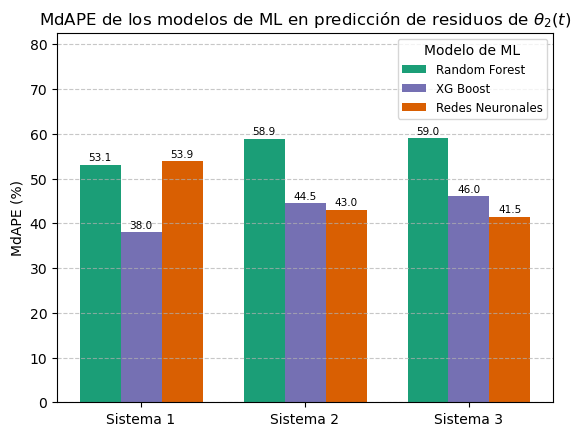

In [214]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(median(theta2_S1RF_mdape)))
vec1.append("{:.3g}".format(median(theta2_S1XGB_mdape)))
vec1.append("{:.3g}".format(median(theta2_S1NN_mdape)))

vec2.append("{:.3g}".format(median(theta2_S2RF_mdape)))
vec2.append("{:.3g}".format(median(theta2_S2XGB_mdape)))
vec2.append("{:.3g}".format(median(theta2_S2NN_mdape)))

vec3.append("{:.3g}".format(median(theta2_S3RF_mdape)))
vec3.append("{:.3g}".format(median(theta2_S3XGB_mdape)))
vec3.append("{:.3g}".format(median(theta2_S3NN_mdape)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_ML(vec, "theta2", "MdAPE")

## $\phi_2(t)$

In [215]:
phi2_S1RF_mdape = [21.0, 29.0, 44.4, 36.1, 13.4, 18.6, 11.3, 88.3, 1.88, 51.5, 11.3, 4.61, 33.2, 78.9, 9.39, 42.7, 40.1, 62.6]
phi2_S1XGB_mdape = [9.29, 28.9, 43.3, 32.2, 6.68, 16.0, 11.6, 87.1, 3.19, 49.6, 7.19, 3.74, 31.9, 53.8, 6.48, 42.2, 33.3, 62.7]
phi2_S1NN_mdape = [3.96, 34.1, 45.0, 58.2, 11.3, 18.9, 10.9, 87.2, 5.06, 45.0, 12.4, 6.79, 36.3, 45.5, 4.84, 42.9, 32.0, 65.2]

phi2_S2RF_mdape = [21.9, 14.6, 9.05, 12.1, 17.0, 15.9, 23.9, 14.3, 12.9, 3.57, 14.2, 48.9, 18.4, 16.1, 0.981, 12.8, 7.09, 12.2]
phi2_S2XGB_mdape = [21.5, 13.1, 7.90, 9.48, 17.1, 16.1, 23.2, 10.6, 11.9, 1.41, 7.51, 48.8, 11.2, 11.2, 2.12, 8.69, 5.97, 11.8]
phi2_S2NN_mdape = [22.3, 13.8, 11.1, 9.53, 19.4, 24.3, 23.7, 13.1, 15.2, 8.65, 21.6, 49.8, 6.20, 14.8, 4.77, 10.9, 8.88, 12.6]

phi2_S3RF_mdape = [6.00, 27.4, 40.6, 17.1, 23.7, 3.21, 18.7, 10.9, 11.2, 20.8, 10.3, 46.8, 4.23, 27.5, 4.72, 14.6, 23.2, 2.17]
phi2_S3XGB_mdape = [4.79, 26.1, 41.2, 17.4, 22.7, 1.80, 14.2, 11.2, 10.2, 20.6, 5.96, 46.7, 3.88, 23.2, 3.16, 11.3, 22.1, 4.24]
phi2_S3NN_mdape = [2.05, 24.8, 42.0, 17.9, 21.7, 0.806, 14.1, 12.6, 10.6, 21.8, 3.28, 49.1, 5.95, 15.0, 2.08, 11.8, 24.1, 9.78]

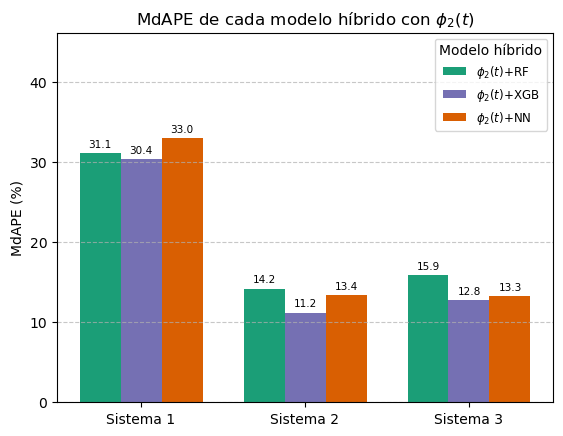

In [216]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(median(phi2_S1RF_mdape)))
vec1.append("{:.3g}".format(median(phi2_S1XGB_mdape)))
vec1.append("{:.3g}".format(median(phi2_S1NN_mdape)))

vec2.append("{:.3g}".format(median(phi2_S2RF_mdape)))
vec2.append("{:.3g}".format(median(phi2_S2XGB_mdape)))
vec2.append("{:.3g}".format(median(phi2_S2NN_mdape)))

vec3.append("{:.3g}".format(median(phi2_S3RF_mdape)))
vec3.append("{:.3g}".format(median(phi2_S3XGB_mdape)))
vec3.append("{:.3g}".format(median(phi2_S3NN_mdape)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_ML(vec, "phi2", "MdAPE")

## $\theta_3(t)$

In [217]:
theta3_S1RF_mdape = [58.3, 85.4, 57.9, 61.3, 51.3, 65.2]
theta3_S1XGB_mdape = [52.5, 73.7, 43.0, 57.2, 40.9, 40.3]
theta3_S1NN_mdape = [35.3, 52.7, 60.1, 75.2, 27.2, 34.5]

theta3_S2RF_mdape = [70.1, 76.2, 73.8, 53.0, 60.7, 56.4, 54.1, 67.7]
theta3_S2XGB_mdape = [43.0, 69.3, 57.3, 38.5, 33.3, 41.5, 49.7, 47.6]
theta3_S2NN_mdape = [37.3, 46.2, 94.2, 30.9, 26.7, 27.9, 19.0, 42.2]

theta3_S3RF_mdape = [68.3, 78.2, 57.9, 72.1, 43.5, 75.4, 87.2, 56.8, 65.7, 61.0, 63.3]
theta3_S3XGB_mdape = [52.0, 70.7, 45.8, 61.9, 53.8, 58.2, 71.3, 44.2, 49.3, 53.7, 53.1]
theta3_S3NN_mdape = [37.2, 48.1, 53.9, 35.3, 31.1, 32.2, 29.2, 48.4, 28.0, 26.9, 22.2]

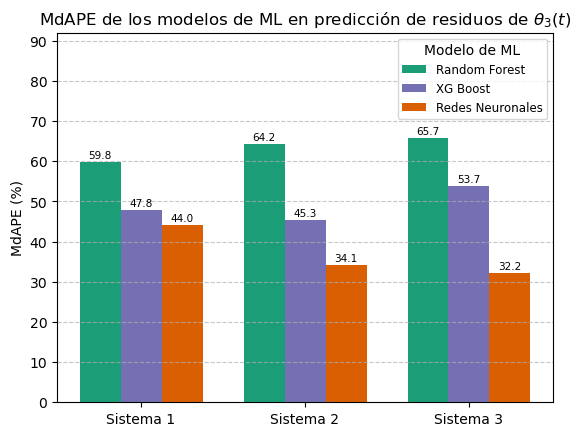

In [218]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(median(theta3_S1RF_mdape)))
vec1.append("{:.3g}".format(median(theta3_S1XGB_mdape)))
vec1.append("{:.3g}".format(median(theta3_S1NN_mdape)))

vec2.append("{:.3g}".format(median(theta3_S2RF_mdape)))
vec2.append("{:.3g}".format(median(theta3_S2XGB_mdape)))
vec2.append("{:.3g}".format(median(theta3_S2NN_mdape)))

vec3.append("{:.3g}".format(median(theta3_S3RF_mdape)))
vec3.append("{:.3g}".format(median(theta3_S3XGB_mdape)))
vec3.append("{:.3g}".format(median(theta3_S3NN_mdape)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_ML(vec, "theta3", "MdAPE")

## $\phi_3(t)$

In [219]:
phi3_S1RF_mdape = [35.5, 19.4, 13.3, 6.55, 96.0, 9.58]
phi3_S1XGB_mdape = [32.2, 17.0, 8.44, 4.96, 51.3, 6.87]
phi3_S1NN_mdape = [28.9, 23.2, 17.6, 9.39, 11.7, 5.80]

phi3_S2RF_mdape = [14.2, 8.37, 15.2, 12.2, 20.6, 22.9, 18.9, 7.74]
phi3_S2XGB_mdape = [12.7, 7.98, 16.4, 15.4, 8.98, 11.6, 11.2, 6.13]
phi3_S2NN_mdape = [10.3, 5.38, 13.0, 15.3, 14.9, 22.4, 17.4, 7.12]

phi3_S3RF_mdape = [35.1, 26.7, 23.4, 6.37, 17.6, 11.4, 12.4, 4.03, 5.09, 13.9, 4.18]
phi3_S3XGB_mdape = [12.6, 25.7, 22.7, 3.65, 14.2, 10.7, 10.4, 3.68, 3.16, 11.1, 2.23]
phi3_S3NN_mdape = [60.8, 22.9, 20.7, 1.21, 16.0, 9.28, 12.0, 5.35, 5.56, 7.82, 6.58]

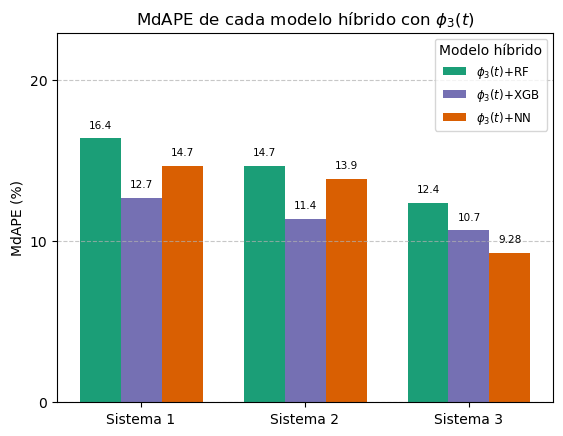

In [220]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(median(phi3_S1RF_mdape)))
vec1.append("{:.3g}".format(median(phi3_S1XGB_mdape)))
vec1.append("{:.3g}".format(median(phi3_S1NN_mdape)))

vec2.append("{:.3g}".format(median(phi3_S2RF_mdape)))
vec2.append("{:.3g}".format(median(phi3_S2XGB_mdape)))
vec2.append("{:.3g}".format(median(phi3_S2NN_mdape)))

vec3.append("{:.3g}".format(median(phi3_S3RF_mdape)))
vec3.append("{:.3g}".format(median(phi3_S3XGB_mdape)))
vec3.append("{:.3g}".format(median(phi3_S3NN_mdape)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_ML(vec, "phi3", "MdAPE")

# **Gráficos de barras de $R^2$ (ML;  general)**

## $\theta_1(t)$

### *Random Forest*

In [221]:
# Valores
r2_1_1 = [82.6, 66.7, 56.3, 75.2, 78.9, 81.2, 16.0, 83.0, 44.0, 67.7, 81.6, 69.3, 77.9, 1.20, -1.70, -41.4, 75.5, 41.0, -14.9, 65.5, 21.2, 57.6, 76.4, 62.4, 77.3, 64.5, 49.3, 63.6, 35.1, 32.7, 83.4, 41.5, 65.2, 61.5, 46.1, 64.7, 69.8, 46.9, 33.4, 47.7, 51.3, 36.1, 65.5, 66.7, 62.2, 64.2, 76.0, 59.7, 79.8, 51.0, 66.4, 79.8, 83.6, 34.1]
median1_1 = "{:.3g}".format(median(r2_1_1))

### *XG Boost*

In [222]:
# Valores
r2_2_1 = [90.0, 86.0, 79.0, 91.3, 93.7, 91.9, 58.8, 92.3, 79.6, 78.0, 93.1, 83.4, 90.5, 50.5, 43.3, 20.2, 88.6, 71.9, 43.3, 85.2, 54.9, 84.6, 91.9, 82.0, 90.2, 85.1, 78.1, 84.2, 68.2, 68.3, 94.3, 77.4, 87.5, 82.5, 80.1, 87.6, 84.2, 78.9, 66.7, 78.1, 79.9, 72.4, 83.6, 87.4, 81.3, 86.0, 91.0, 85.7, 91.5, 73.7, 85.8, 92.0, 94.2, 67.1]
median2_1 = "{:.3g}".format(median(r2_2_1))

### *Neural Networks*

In [223]:
# Valores
r2_3_1 = [91.0, 52.3, 16.0, 38.5, 86.1, 91.6, 85.3, 90.0, -29.5, 76.5, 93.3, 66.9, 94.2, -51.9, 12.2, -185, 81.2, 74.7, -113, 81.2, -32.4, 8.89, 92.5, 68.9, 92.1, 86.6, 77.3, 26.8, 36.8, -46.0, 89.7, 85.7, 17.1, 4.09, 88.5, 23.0, 68.9, 75.1, 44.8, 88.7, 88.8, 0.609, 40.0, 90.9, 80.2, 12.8, 86.1, 53.6, 80.4, 74.3, 85.5, 93.1, 60.8, 75.2]
median3_1 = "{:.3g}".format(median(r2_3_1))

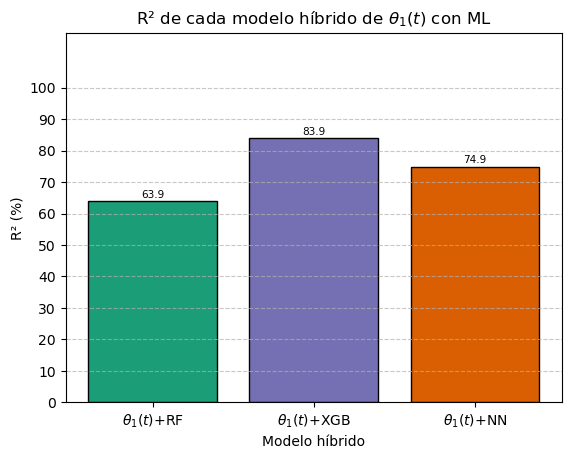

In [224]:
barsR2_ML(median1_1, median2_1, median3_1, "theta1")

## $\theta_2(t)$

### *Random Forest*

In [225]:
# Valores
r2_1_2 = [61.4, 68.9, 69.0, 78.4, 75.2, 72.9, 61.8, 77.0, 60.9, 63.4, 64.8, 73.2, 65.6, 56.0, 54.6, 53.1, 72.9, 59.5, 41.6, 80.2, 43.2, 88.5, 67.6, 62.6, 70.9, 73.3, 63.6, 77.0, 54.0, 55.0, 66.8, 60.4, 86.1, 75.3, 63.1, 86.9, 76.4, 56.1, 42.5, 61.7, 62.1, 57.2, 59.9, 69.1, 69.1, 69.2, 66.8, 76.0, 68.7, 63.4, 69.2, 70.8, 83.9, 63.0]
median1_2 = "{:.3g}".format(median(r2_1_2))

### *XG Boost*

In [226]:
# Valores
r2_2_2 = [79.0, 86.6, 84.0, 92.2, 91.9, 89.1, 81.5, 89.7, 86.4, 75.3, 87.9, 85.4, 84.8, 75.4, 72.7, 72.6, 88.3, 81.1, 68.6, 91.3, 65.2, 88.5, 88.6, 82.5, 87.6, 88.4, 85.1, 89.8, 54.0, 77.5, 90.1, 83.9, 92.8, 87.9, 84.7, 93.3, 88.1, 82.3, 70.8, 83.8, 84.6, 79.1, 81.8, 88.9, 84.2, 88.6, 86.9, 90.9, 88.4, 79.1, 87.8, 89.0, 94.4, 80.4]
median2_2 = "{:.3g}".format(median(r2_2_2))

### *Neural Networks*

In [227]:
# Valores
r2_3_2 = [75.7, 52.2, 40.3, 45.1, 80.6, 88.2, 87.4, 88.5, 8.34, 72.2, 92.7, 78.7, 91.6, 15.6, 44.1, 0.597, 88.8, 74.3, -8.74, 62.6, 51.1, 43.1, 89.4, 35.6, 92.2, 83.6, 86.2, 56.4, 13.7, 4.09, 83.9, 88.6, 70.1, 40.9, 84.7, 74.3, 66.6, 83.9, 57.2, 89.7, 91.0, 20.8, 26.4, 91.1, 68.9, 32.5, 86.6, 46.6, 86.5, 81.0, 74.0, 91.7, 59.0, 82.2]
median3_2 = "{:.3g}".format(median(r2_3_2))

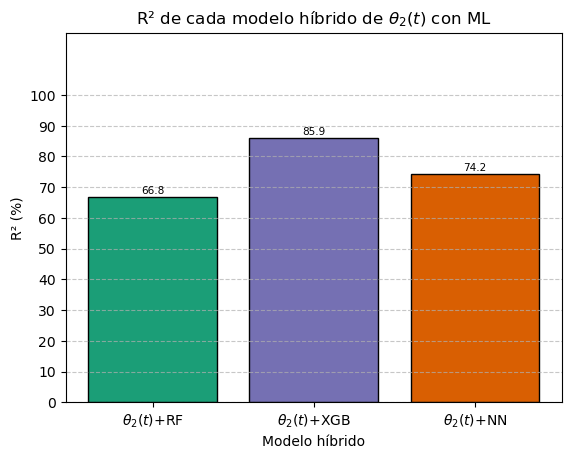

In [228]:
barsR2_ML(median1_2, median2_2, median3_2, "theta2")

## $\theta_3(t)$

### *Random Forest*

In [229]:
# Valores
r2_1_3 = [77.6, 79.1, 39.3, 81.9, 65.7, 70.8, 29.7, 30.6, 74.3, 49.1, 74.0, 69.4, 56.8, 44.4, 43.6, 50.0, 51.3, 36.7, 53.3, 55.7, 63.2, 65.1, 57.9, 75.7, 47.8]
median1_3 = "{:.3g}".format(median(r2_1_3))

### *XG Boost*

In [230]:
# Valores
r2_2_3 = [93.1, 91.2, 72.0, 91.5, 76.8, 86.0, 66.7, 59.8, 88.6, 76.1, 88.8, 86.6, 80.8, 71.6, 72.2, 79.7, 79.8, 67.6, 81.1, 81.6, 82.9, 83.5, 77.2, 90.4, 73.0]
median2_3 = "{:.3g}".format(median(r2_2_3))

### *Neural Networks*

In [231]:
# Valores
r2_3_3 = [87.8, 90.8, 78.3, 91.7, 76.1, 82.6, -51.1, 37.4, 80.7, 73.7, 89.4, 79.1, 86.0, -3.50, -27.2, 88.1, 80.6, 51.7, 82.1, 89.0, 35.3, 73.3, 64.4, 93.0, 85.1]
median3_3 = "{:.3g}".format(median(r2_3_3))

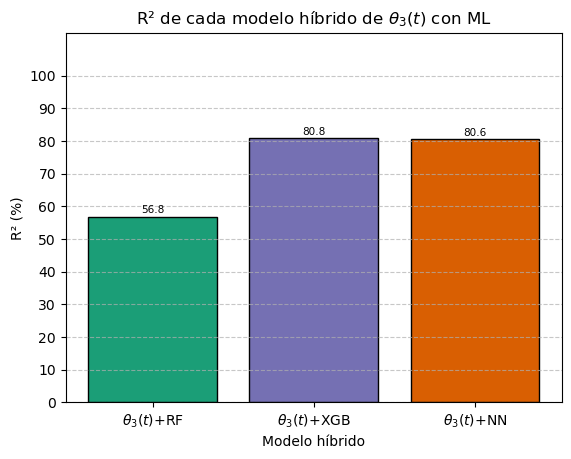

In [232]:
barsR2_ML(median1_3, median2_3, median3_3, "theta3")

# **Gráficos de barras de $R^2$ (ML;  por radio)**

## $\theta_1(t)$

### *Random Forest*

In [233]:
R1_RFtheta1_r2 = [82.6, 66.7, 56.3, 75.2, 78.9, 81.2, 16.0, 83.0, 44.0]
R2_RFtheta1_r2 = [67.7, 81.6, 69.3, 77.9, 1.20, -1.70, -41.4, 75.5, 41.0]
R3_RFtheta1_r2 = [-14.9, 65.5, 21.2, 57.6, 76.4, 62.4, 77.3, 64.5, 49.3]
R4_RFtheta1_r2 = [63.6, 35.1, 32.7, 83.4, 41.5, 65.2, 61.5, 46.1, 64.7]
R5_RFtheta1_r2 = [69.8, 46.9, 33.4, 47.7, 51.3, 36.1, 65.5, 66.7, 62.2]

### *XG Boost*

In [234]:
R1_XGBtheta1_r2 = [90.0, 86.0, 79.0, 91.3, 93.7, 91.9, 58.8, 92.3, 79.6]
R2_XGBtheta1_r2 = [78.0, 93.1, 83.4, 90.5, 50.5, 43.3, 20.2, 88.6, 71.9]
R3_XGBtheta1_r2 = [43.3, 85.2, 54.9, 84.6, 91.9, 82.0, 90.2, 85.1, 78.1]
R4_XGBtheta1_r2 = [84.2, 68.2, 68.3, 94.3, 77.4, 87.5, 82.5, 80.1, 87.6]
R5_XGBtheta1_r2 = [84.2, 78.9, 66.7, 78.1, 79.9, 72.4, 83.6, 87.4, 81.3]

### *Neural Networks*

In [235]:
R1_NNtheta1_r2 = [91.0, 52.3, 16.0, 38.5, 86.1, 91.6, 85.3, 90.0, -29.5]
R2_NNtheta1_r2 = [76.5, 93.3, 66.9, 94.2, -51.9, 12.2, -185, 81.2, 74.7]
R3_NNtheta1_r2 = [-113, 81.2, -32.4, 8.89, 92.5, 68.9, 92.1, 86.6, 77.3]
R4_NNtheta1_r2 = [26.8, 36.8, -46.0, 89.7, 85.7, 17.1, 4.09, 88.5, 23.0]
R5_NNtheta1_r2 = [68.9, 75.1, 44.8, 88.7, 88.8, 0.609, 40.0, 90.9, 80.2]

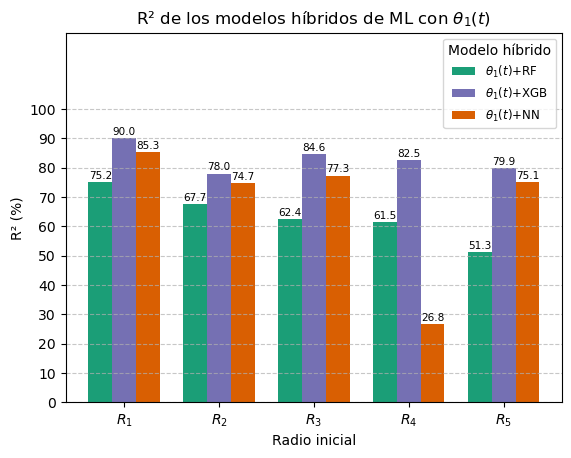

In [236]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(median(R1_RFtheta1_r2)))
vec1.append("{:.3g}".format(median(R1_XGBtheta1_r2)))
vec1.append("{:.3g}".format(median(R1_NNtheta1_r2)))

vec2.append("{:.3g}".format(median(R2_RFtheta1_r2)))
vec2.append("{:.3g}".format(median(R2_XGBtheta1_r2)))
vec2.append("{:.3g}".format(median(R2_NNtheta1_r2)))

vec3.append("{:.3g}".format(median(R3_RFtheta1_r2)))
vec3.append("{:.3g}".format(median(R3_XGBtheta1_r2)))
vec3.append("{:.3g}".format(median(R3_NNtheta1_r2)))

vec4.append("{:.3g}".format(median(R4_RFtheta1_r2)))
vec4.append("{:.3g}".format(median(R4_XGBtheta1_r2)))
vec4.append("{:.3g}".format(median(R4_NNtheta1_r2)))

vec5.append("{:.3g}".format(median(R5_RFtheta1_r2)))
vec5.append("{:.3g}".format(median(R5_XGBtheta1_r2)))
vec5.append("{:.3g}".format(median(R5_NNtheta1_r2)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)

barsR2_ML_radius(vec, "theta1")

## $\theta_2(t)$

### *Random Forest*

In [237]:
R1_RFtheta2_r2 = [61.4, 68.9, 69.0, 78.4, 75.2, 72.9, 61.8, 77.0, 60.9]
R2_RFtheta2_r2 = [63.4, 64.8, 73.2, 65.6, 56.0, 54.6, 53.1, 72.9, 59.5]
R3_RFtheta2_r2 = [41.6, 80.2, 43.2, 88.5, 67.6, 62.6, 70.9, 73.3, 63.6]
R4_RFtheta2_r2 = [77.0, 54.0, 55.0, 66.8, 60.4, 86.1, 75.3, 63.1, 86.9]
R5_RFtheta2_r2 = [76.4, 56.1, 42.5, 61.7, 62.1, 57.2, 59.9, 69.1, 69.1]

### *XG Boost*

In [238]:
R1_XGBtheta2_r2 = [79.0, 86.6, 84.0, 92.2, 91.9, 89.1, 81.5, 89.7, 86.4]
R2_XGBtheta2_r2 = [75.3, 87.9, 85.4, 84.8, 75.4, 72.7, 72.6, 88.3, 81.1]
R3_XGBtheta2_r2 = [68.6, 91.3, 65.2, 88.5, 88.6, 82.5, 87.6, 88.4, 85.1]
R4_XGBtheta2_r2 = [89.8, 54.0, 77.5, 90.1, 83.9, 92.8, 87.9, 84.7, 93.3]
R5_XGBtheta2_r2 = [88.1, 82.3, 70.8, 83.8, 84.6, 79.1, 81.8, 88.9, 84.2]

### *Neural Networks*

In [239]:
R1_NNtheta2_r2 = [75.7, 52.2, 40.3, 45.1, 80.6, 88.2, 87.4, 88.5, 8.34]
R2_NNtheta2_r2 = [72.2, 92.7, 78.7, 91.6, 15.6, 44.1, 0.597, 88.8, 74.3]
R3_NNtheta2_r2 = [-8.74, 62.6, 51.1, 43.1, 89.4, 35.6, 92.2, 83.6, 86.2]
R4_NNtheta2_r2 = [56.4, 13.7, 4.09, 83.9, 88.6, 70.1, 40.9, 84.7, 74.3]
R5_NNtheta2_r2 = [66.6, 83.9, 57.2, 89.7, 91.0, 20.8, 26.4, 91.1, 68.9]

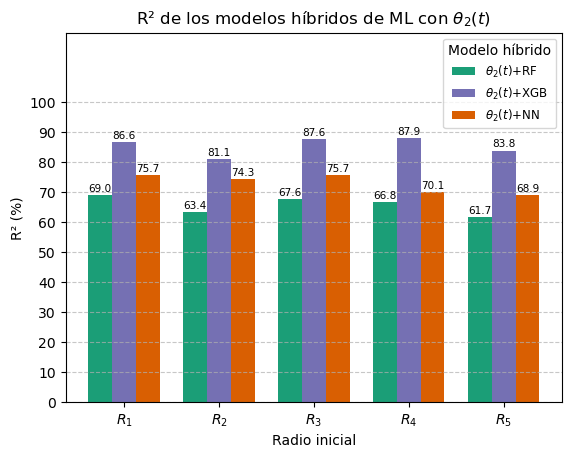

In [240]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(median(R1_RFtheta2_r2)))
vec1.append("{:.3g}".format(median(R1_XGBtheta2_r2)))
vec1.append("{:.3g}".format(median(R1_NNtheta2_r2)))

vec2.append("{:.3g}".format(median(R2_RFtheta2_r2)))
vec2.append("{:.3g}".format(median(R2_XGBtheta2_r2)))
vec2.append("{:.3g}".format(median(R2_NNtheta2_r2)))

vec3.append("{:.3g}".format(median(R3_RFtheta2_r2)))
vec3.append("{:.3g}".format(median(R3_XGBtheta2_r2)))
vec3.append("{:.3g}".format(median(R1_NNtheta2_r2)))

vec4.append("{:.3g}".format(median(R4_RFtheta2_r2)))
vec4.append("{:.3g}".format(median(R4_XGBtheta2_r2)))
vec4.append("{:.3g}".format(median(R4_NNtheta2_r2)))

vec5.append("{:.3g}".format(median(R5_RFtheta2_r2)))
vec5.append("{:.3g}".format(median(R5_XGBtheta2_r2)))
vec5.append("{:.3g}".format(median(R5_NNtheta2_r2)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)

barsR2_ML_radius(vec, "theta2")

## $\theta_3(t)$

### *Random Forest*

In [241]:
R1_RFtheta3_r2 = [77.6, 79.1, 39.3, 81.9]
R2_RFtheta3_r2 = [65.7, 70.8, 29.7, 30.6, 74.3, 49.1]
R3_RFtheta3_r2 = [74.0, 69.4, 56.8]
R4_RFtheta3_r2 = [44.4, 43.6, 50.0]
R5_RFtheta3_r2 = [51.3, 36.7, 53.3, 55.7, 63.2, 65.1]

### *XG Boost*

In [242]:
R1_XGBtheta3_r2 = [93.1, 91.2, 72.0, 91.5]
R2_XGBtheta3_r2 = [76.8, 86.0, 66.7, 59.8, 88.6, 76.1]
R3_XGBtheta3_r2 = [88.8, 86.6, 80.8]
R4_XGBtheta3_r2 = [71.6, 72.2, 79.7]
R5_XGBtheta3_r2 = [79.8, 67.6, 81.1, 81.6, 82.9, 83.5]

### *Neural Networks*

In [243]:
R1_NNtheta3_r2 = [87.8, 90.8, 78.3, 91.7]
R2_NNtheta3_r2 = [76.1, 82.6, -51.1, 37.4, 80.7, 73.7]
R3_NNtheta3_r2 = [89.4, 79.1, 86.0]
R4_NNtheta3_r2 = [-3.50, -27.2, 88.1]
R5_NNtheta3_r2 = [80.6, 51.7, 82.1, 89.0, 35.3, 73.3]

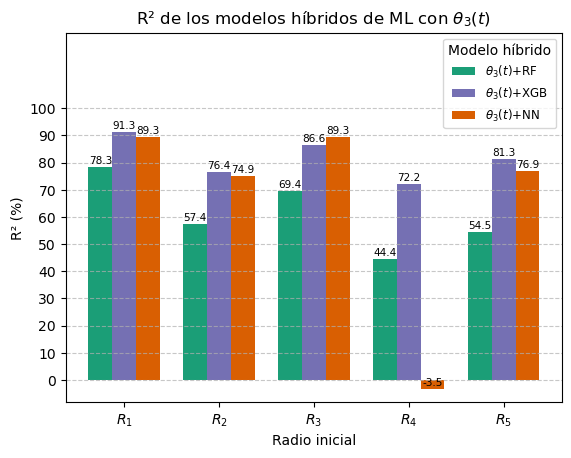

In [244]:
vec1 = []
vec2 = []
vec3 = []
vec4 = []
vec5 = []

vec1.append("{:.3g}".format(median(R1_RFtheta3_r2)))
vec1.append("{:.3g}".format(median(R1_XGBtheta3_r2)))
vec1.append("{:.3g}".format(median(R1_NNtheta3_r2)))

vec2.append("{:.3g}".format(median(R2_RFtheta3_r2)))
vec2.append("{:.3g}".format(median(R2_XGBtheta3_r2)))
vec2.append("{:.3g}".format(median(R2_NNtheta3_r2)))

vec3.append("{:.3g}".format(median(R3_RFtheta3_r2)))
vec3.append("{:.3g}".format(median(R3_XGBtheta3_r2)))
vec3.append("{:.3g}".format(median(R1_NNtheta3_r2)))

vec4.append("{:.3g}".format(median(R4_RFtheta3_r2)))
vec4.append("{:.3g}".format(median(R4_XGBtheta3_r2)))
vec4.append("{:.3g}".format(median(R4_NNtheta3_r2)))

vec5.append("{:.3g}".format(median(R5_RFtheta3_r2)))
vec5.append("{:.3g}".format(median(R5_XGBtheta3_r2)))
vec5.append("{:.3g}".format(median(R5_NNtheta3_r2)))

vec = []

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)

barsR2_ML_radius(vec, "theta3")

# **Gráficos de barras de $R^2$ (ML;  por sistema)**

## $\theta_1(t)$

In [245]:
theta1RF_S1_r2 = [82.6, 66.7, 56.3, 67.7, 81.6, 69.3, -14.9, 65.5, 21.2, 63.6, 35.1, 32.7, 69.8, 46.9, 33.4, 64.2, 76.0, 59.7]
theta1XGB_S1_r2 = [90.0, 86.0, 79.0, 78.0, 93.1, 83.4, 43.3, 85.2, 54.9, 84.2, 68.2, 68.3, 84.2, 78.9, 66.7, 86.0, 91.0, 85.7]
theta1NN_S1_r2 = [91.0, 52.3, 16.0, 76.5, 93.3, 66.9, -113, 81.2, -32.4, 26.8, 36.8, -46.0, 68.9, 75.1, 44.8, 12.8, 86.1, 53.6]

theta1RF_S2_r2 = [75.2, 78.9, 81.2, 77.9, 1.20, -1.70, 57.6, 76.4, 62.4, 83.4, 41.5, 65.2, 47.7, 51.3, 36.1, 79.8, 51.0, 66.4]
theta1XGB_S2_r2 = [91.3, 93.7, 91.9, 90.5, 50.5, 43.3, 84.6, 91.9, 82.0, 94.3, 77.4, 87.5, 78.1, 79.9, 72.4, 91.5, 73.7, 85.8]
theta1NN_S2_r2 = [38.5, 86.1, 91.6, 94.2, -51.9, 12.2, 8.89, 92.5, 68.9, 89.7, 85.7, 17.1, 88.7, 88.8, 0.609, 80.4, 74.3, 85.5]

theta1RF_S3_r2 = [16.0, 83.0, 44.0, -41.4, 75.5, 41.0, 77.3, 64.5, 49.3, 61.5, 46.1, 64.7, 65.5, 66.7, 62.2, 79.8, 83.6, 34.1]
theta1XGB_S3_r2 = [58.8, 92.3, 79.6, 20.2, 88.6, 71.9, 90.2, 85.1, 78.1, 82.5, 80.1, 87.6, 83.6, 87.4, 81.3, 92.0, 94.2, 67.1]
theta1NN_S3_r2 = [85.3, 90.0, -29.5, -185, 81.2, 74.7, 92.1, 86.6, 77.3, 4.09, 88.5, 23.0, 40.0, 90.9, 80.2, 93.1, 60.8, 75.2]

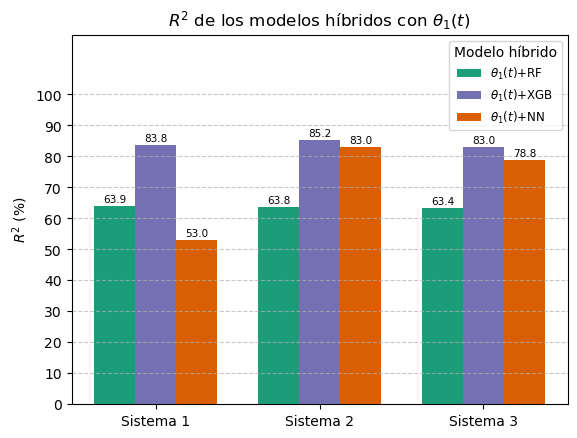

In [246]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(median(theta1RF_S1_r2)))
vec1.append("{:.3g}".format(median(theta1XGB_S1_r2)))
vec1.append("{:.3g}".format(median(theta1NN_S1_r2)))

vec2.append("{:.3g}".format(median(theta1RF_S2_r2)))
vec2.append("{:.3g}".format(median(theta1XGB_S2_r2)))
vec2.append("{:.3g}".format(median(theta1NN_S2_r2)))

vec3.append("{:.3g}".format(median(theta1RF_S3_r2)))
vec3.append("{:.3g}".format(median(theta1XGB_S3_r2)))
vec3.append("{:.3g}".format(median(theta1NN_S3_r2)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_ML(vec, "theta1", "R^2")

## $\theta_2(t)$

In [247]:
theta2RF_S1_r2 = [61.4, 68.9, 69.0, 63.4, 64.8, 73.2, 41.6, 80.2, 43.2, 77.0, 54.0, 55.0, 76.4, 56.1, 42.5, 69.2, 66.8, 76.0]
theta2XGB_S1_r2 = [79.0, 86.6, 84.0, 75.3, 87.9, 85.4, 68.6, 91.3, 65.2, 89.8, 54.0, 77.5, 88.1, 82.3, 70.8, 88.6, 86.9, 90.9]
theta2NN_S1_r2 = [75.7, 52.2, 40.3, 72.2, 92.7, 78.7, -8.74, 62.6, 51.1, 56.4, 13.7, 4.09, 66.6, 83.9, 57.2, 32.5, 86.6, 46.6]

theta2RF_S2_r2 = [78.4, 75.2, 72.9, 65.6, 56.0, 54.6, 88.5, 67.6, 62.6, 66.8, 60.4, 86.1, 61.7, 62.1, 57.2, 68.7, 63.4, 69.2]
theta2XGB_S2_r2 = [92.2, 91.9, 89.1, 84.8, 75.4, 72.7, 88.5, 88.6, 82.5, 90.1, 83.9, 92.8, 83.8, 84.6, 79.1, 88.4, 79.1, 87.8]
theta2NN_S2_r2 = [45.1, 80.6, 88.2, 91.6, 15.6, 44.1, 43.1, 89.4, 35.6, 83.9, 88.6, 70.1, 89.7, 91.0, 20.8, 86.5, 81.0, 74.0]

theta2RF_S3_r2 = [61.8, 77.0, 60.9, 53.1, 72.9, 59.5, 70.9, 73.3, 63.6, 75.3, 63.1, 86.9, 59.9, 69.1, 69.1, 70.8, 83.9, 63.0]
theta2XGB_S3_r2 = [81.5, 89.7, 86.4, 72.6, 88.3, 81.1, 87.6, 88.4, 85.1, 87.9, 84.7, 93.3, 81.8, 88.9, 84.2, 89.0, 94.4, 80.4]
theta2NN_S3_r2 = [87.4, 88.5, 8.34, 0.597, 88.8, 74.3, 92.2, 83.6, 86.2, 40.9, 84.7, 74.3, 26.4, 91.1, 68.9, 91.7, 59.0, 82.2]

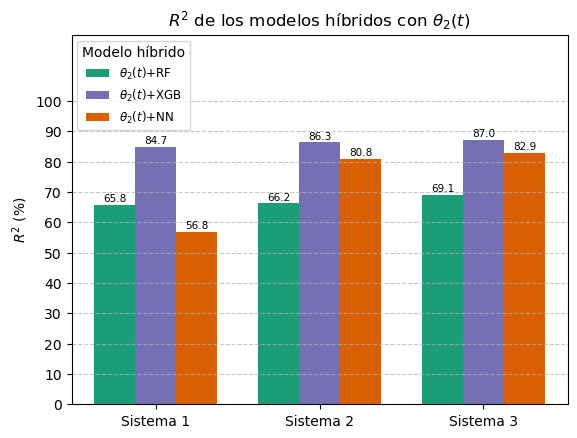

In [248]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(median(theta2RF_S1_r2)))
vec1.append("{:.3g}".format(median(theta2XGB_S1_r2)))
vec1.append("{:.3g}".format(median(theta2NN_S1_r2)))

vec2.append("{:.3g}".format(median(theta2RF_S2_r2)))
vec2.append("{:.3g}".format(median(theta2XGB_S2_r2)))
vec2.append("{:.3g}".format(median(theta2NN_S2_r2)))

vec3.append("{:.3g}".format(median(theta2RF_S3_r2)))
vec3.append("{:.3g}".format(median(theta2XGB_S3_r2)))
vec3.append("{:.3g}".format(median(theta2NN_S3_r2)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_ML(vec, "theta2", "R^2")

## $\theta_3(t)$

In [249]:
theta3RF_S1_r2 = [65.7, 70.8, 44.4, 43.6, 51.3, 36.7]
theta3XGB_S1_r2 = [76.8, 86.0, 71.6, 72.2, 79.8, 67.6]
theta3NN_S1_r2 = [76.1, 82.6, -3.50, -27.2, 80.6, 51.7]

theta3RF_S2_r2 = [77.6, 79.1, 29.7, 30.6, 50.0, 53.3, 55.7, 57.9]
theta3XGB_S2_r2 = [93.1, 91.2, 66.7, 59.8, 79.7, 81.1, 81.6, 77.2]
theta3NN_S2_r2 = [87.8, 90.8, -51.1, 37.4, 88.1, 82.1, 89.0, 64.4]

theta3RF_S3_r2 = [39.3, 81.9, 74.3, 49.1, 74.0, 69.4, 56.8, 63.2, 65.1, 75.7, 47.8]
theta3XGB_S3_r2 = [72.0, 91.5, 88.6, 76.1, 88.8, 86.6, 80.8, 82.9, 83.5, 90.4, 73.0]
theta3NN_S3_r2 = [78.3, 91.7, 80.7, 73.7, 89.4, 79.1, 86.0, 35.3, 73.3, 93.0, 85.1]

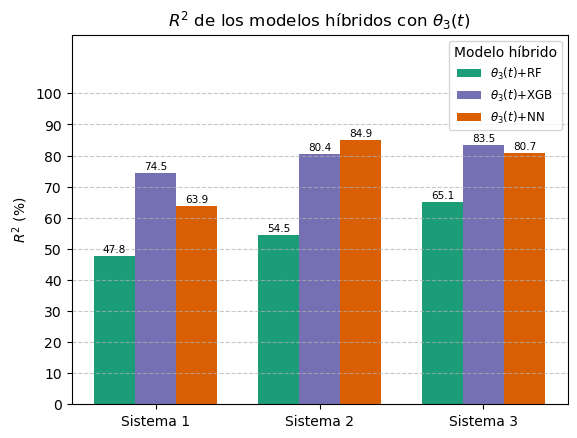

In [250]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(median(theta3RF_S1_r2)))
vec1.append("{:.3g}".format(median(theta3XGB_S1_r2)))
vec1.append("{:.3g}".format(median(theta3NN_S1_r2)))

vec2.append("{:.3g}".format(median(theta3RF_S2_r2)))
vec2.append("{:.3g}".format(median(theta3XGB_S2_r2)))
vec2.append("{:.3g}".format(median(theta3NN_S2_r2)))

vec3.append("{:.3g}".format(median(theta3RF_S3_r2)))
vec3.append("{:.3g}".format(median(theta3XGB_S3_r2)))
vec3.append("{:.3g}".format(median(theta3NN_S3_r2)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_metric_system_ML(vec, "theta3", "R^2")

# **Error en el cálculo de $\tau$ (general)**

In [251]:
tau1 = [2.85, 4.50, 3.31, 2.14, 2.45, 2.14, 2.20, 3.23, 51.4, 3.07, 3.93, 3.93, 2.76, 1.83, 2.14, 2.54, 2.88, 3.54, 2.67, 2.99, 2.67, 1.85, 8.62, 1.20, 1.87, 1.52, 1.87, 2.36, 2.36, 2.04, 6.74, 1.20, 1.52, 8.78, 1.52, 0.832, 8.09, 2.04, 1.39, 1.54, 1.52, 1.20, 5.10, 1.18, 0.832, 3.94, 3.93, 3.93, 0.884, 2.47, 1.52, 2.88, 3.21, 2.54]
tau2 = [2.42, 4.39, 3.13, 1.97, 2.23, 1.82, 2.10, 2.86, 51.3, 2.20, 2.24, 3.57, 1.31, 1.57, 1.92, 2.13, 1.30, 3.09, 1.86, 1.18, 1.89, 0.700, 5.98, 0.404, 1.05, 0.514, 0.932, 1.86, 1.03, 0.726, 2.28, 0.0858, 1.13, 6.06, 0.174, 3.02, 3.45, 0.172, 0.792, 0.421, 0.404, 0.827, 0.801, 1.79, 1.97, 3.38, 2.55, 3.14, 2.12, 1.59, 0.517, 0.0529, 1.92, 1.78]

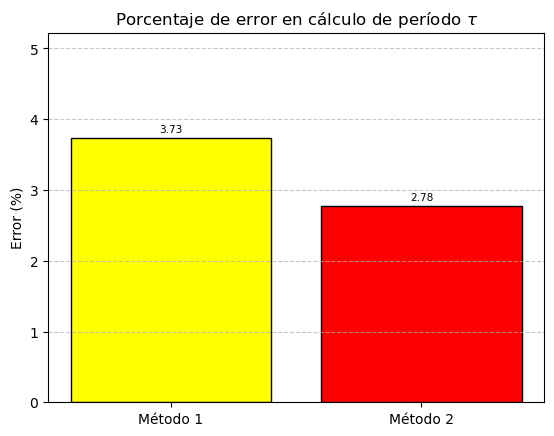

In [252]:
errTau_general("{:.3g}".format(mean(tau1)), "{:.3g}".format(mean(tau2)))

# **Error en el cálculo de $\tau$ (sistema)**

In [253]:
tau1_S1 = [2.85, 4.50, 3.31, 3.07, 3.93, 3.93, 2.67, 2.99, 2.67, 2.36, 2.36, 2.04, 8.09, 2.04, 1.39, 3.94, 3.93, 3.93]
tau2_S1 = [2.42, 4.39, 3.13, 2.20, 2.24, 3.57, 1.86, 1.18, 1.89, 1.86, 1.03, 0.726, 3.45, 0.172, 0.792, 3.38, 2.55, 3.14]

tau1_S2 = [2.14, 2.45, 2.14, 2.76, 1.83, 2.14, 1.85, 8.62, 1.20, 6.74, 1.20, 1.52, 1.54, 1.52, 1.20, 0.884, 2.47, 1.52]
tau2_S2 = [1.97, 2.23, 1.82, 1.31, 1.57, 1.92, 0.700, 5.98, 0.404, 2.28, 0.0858, 1.13, 0.421, 0.404, 0.827, 2.12, 1.59, 0.517]

tau1_S3 = [2.20, 3.23, 51.4, 2.54, 2.88, 3.54, 1.87, 1.52, 1.87, 8.78, 1.52, 0.832, 5.10, 1.18, 0.832, 2.88, 3.21, 2.54]
tau2_S3 = [2.10, 2.86, 51.3, 2.13, 1.30, 3.09, 1.05, 0.514, 0.932, 6.06, 0.174, 3.02, 0.801, 1.79, 1.97, 0.0529, 1.92, 1.78]

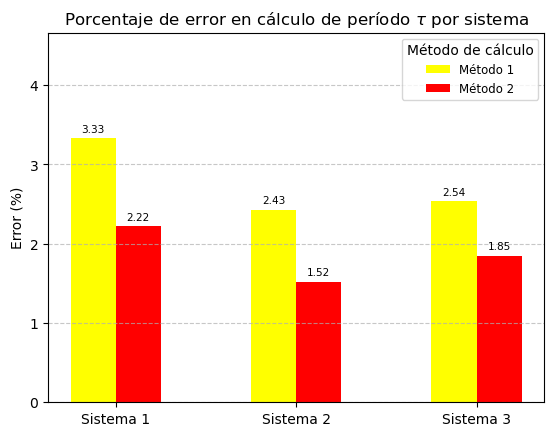

In [254]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append("{:.3g}".format(mean(tau1_S1)))
vec1.append("{:.3g}".format(mean(tau2_S1)))

vec2.append("{:.3g}".format(mean(tau1_S2)))
vec2.append("{:.3g}".format(mean(tau2_S2)))

# Mediana por punto atípico
vec3.append("{:.3g}".format(median(tau1_S3)))
vec3.append("{:.3g}".format(median(tau2_S3)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

errTau_system(vec)

# **Error en el cálculo de $\tau$ (radio)**

In [255]:
tau1_R1 = [2.85, 4.50, 3.31, 2.14, 2.45, 2.14, 2.20, 3.23, 51.4]
tau2_R1 = [2.42, 4.39, 3.13, 1.97, 2.23, 1.82, 2.10, 2.86, 51.3]

tau1_R2 = [3.07, 3.93, 3.93, 2.76, 1.83, 2.14, 2.54, 2.88, 3.54]
tau2_R2 = [2.20, 2.24, 3.57, 1.31, 1.57, 1.92, 2.13, 1.30, 3.09]

tau1_R3 = [2.67, 2.99, 2.67, 1.85, 8.62, 1.20, 1.87, 1.52, 1.87]
tau2_R3 = [1.86, 1.18, 1.89, 0.700, 5.98, 0.404, 1.05, 0.514, 0.932]

tau1_R4 = [2.36, 2.36, 2.04, 6.74, 1.20, 1.52, 8.78, 1.52, 0.832]
tau2_R4 = [1.86, 1.03, 0.726, 2.28, 0.0858, 1.13, 6.06, 0.174, 3.02]

tau1_R5 = [8.09, 2.04, 1.39, 1.54, 1.52, 1.20, 5.10, 1.18, 0.832]
tau2_R5 = [3.45, 0.172, 0.792, 0.421, 0.404, 0.827, 0.801, 1.79, 1.97]

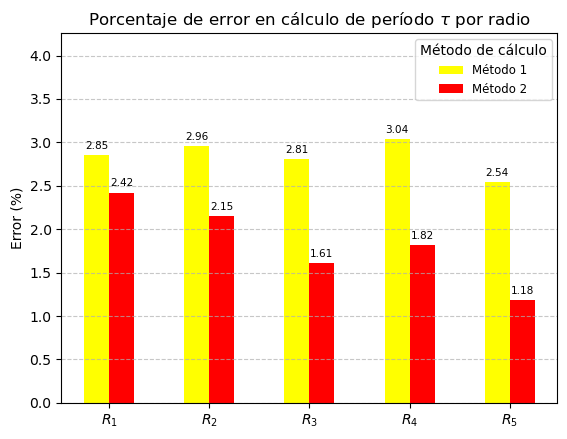

In [256]:
vec, vec1, vec2, vec3, vec4, vec5 = [], [], [], [], [], []

#Utilizar mediana en R1 por punto atípico en S3_R1_3
vec1.append("{:.3g}".format(median(tau1_R1)))
vec1.append("{:.3g}".format(median(tau2_R1)))

vec2.append("{:.3g}".format(mean(tau1_R2)))
vec2.append("{:.3g}".format(mean(tau2_R2)))

vec3.append("{:.3g}".format(mean(tau1_R3)))
vec3.append("{:.3g}".format(mean(tau2_R3)))

vec4.append("{:.3g}".format(mean(tau1_R4)))
vec4.append("{:.3g}".format(mean(tau2_R4)))

vec5.append("{:.3g}".format(mean(tau1_R5)))
vec5.append("{:.3g}".format(mean(tau2_R5)))

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)
vec.append(vec4)
vec.append(vec5)

vec = np.array(vec)

errTau_radius(vec)

# **Error en el cálculo de $\theta_f$ (general)**

In [257]:
tf = [9.13, 7.14, 13.4, 4.34, 7.01, 1.44, 28.6, 1.38, 8.06, 4.75, 9.52, 0.0294, 1.68, 23.6, 24.4, 21.7, 2.73, 10.2, 17.1, 21.9, 6.35, 7.79, 0.329, 1.73, 1.42, 7.14, 8.59, 12.6, 9.42, 13.1, 13.1, 9.54, 16.4, 1.86, 10.9, 9.98, 2.35, 16.9, 6.31, 7.63, 4.87, 12.5, 9.62, 2.68, 10.5, 9.48, 5.59, 22.3, 4.97, 6.24, 1.60, 3.16, 0.0932, 18.6]

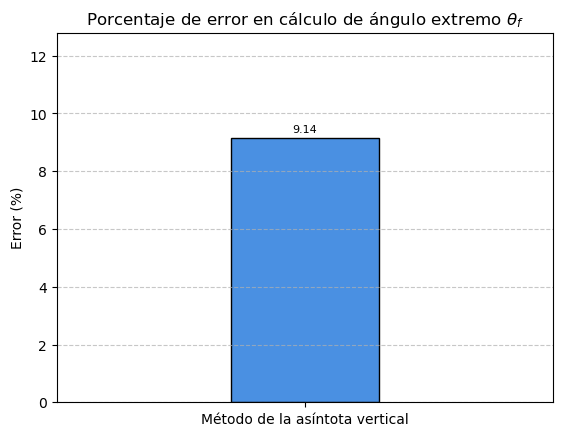

In [258]:
errthetaf_general("{:.3g}".format(mean(tf)))

# **Error en el cálculo de $\theta_f$ (sistema)**

In [259]:
tf_S1 = [9.13, 7.14, 13.4, 4.75, 9.52, 0.0294, 17.1, 21.9, 6.35, 12.6, 9.42, 13.1, 2.35, 16.9, 6.31, 9.48, 5.59, 22.3]
tf_S2 = [4.34, 7.01, 1.44, 1.68, 23.6, 24.4, 7.79, 0.329, 1.73, 13.1, 9.54, 16.4, 7.63, 4.87, 12.5, 4.97, 6.24, 1.60]
tf_S3 = [28.6, 1.38, 8.06, 21.7, 2.73, 10.2, 1.42, 7.14, 8.59, 1.86, 10.9, 9.98, 9.62, 2.68, 10.5, 3.16, 0.0932, 18.6]

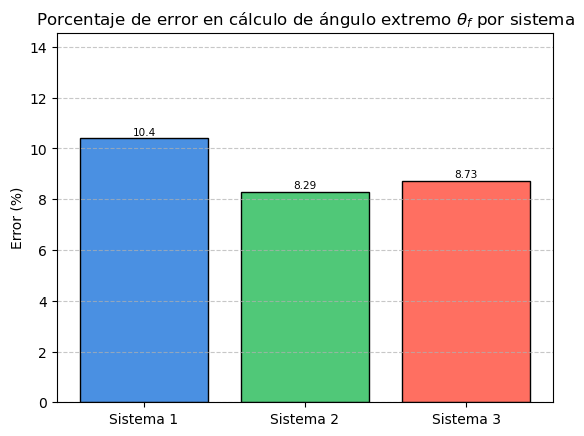

In [260]:
errthetaf_system("{:.3g}".format(mean(tf_S1)), "{:.3g}".format(mean(tf_S2)), "{:.3g}".format(mean(tf_S3)))

# **Error en el cálculo de $\theta_f$ (radio)**

In [261]:
tf_R1 = [9.13, 7.14, 13.4, 4.34, 7.01, 1.44, 28.6, 1.38, 8.06]
tf_R2 = [4.75, 9.52, 0.0294, 1.68, 23.6, 24.4, 21.7, 2.73, 10.2]
tf_R3 = [17.1, 21.9, 6.35, 7.79, 0.329, 1.73, 1.42, 7.14, 8.59]
tf_R4 = [12.6, 9.42, 13.1, 13.1, 9.54, 16.4, 1.86, 10.9, 9.98]
tf_R5 = [2.35, 16.9, 6.31, 7.63, 4.87, 12.5, 9.62, 2.68, 10.5]

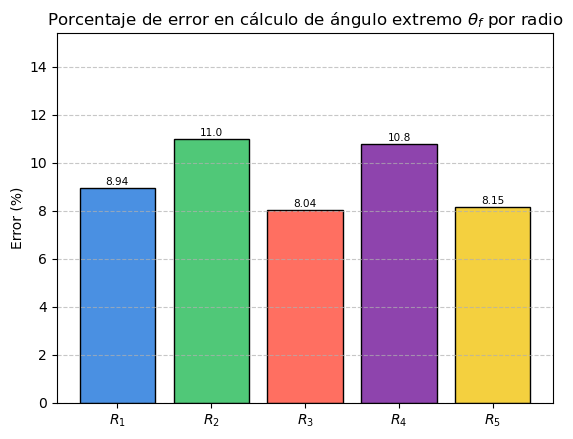

In [262]:
errthetaf_radius("{:.3g}".format(mean(tf_R1)), "{:.3g}".format(mean(tf_R2)), "{:.3g}".format(mean(tf_R3)), "{:.3g}".format(mean(tf_R4)), "{:.3g}".format(mean(tf_R5)))

# **Comparación entre soluciones analíticas y modelos híbridos**

## $\theta$ (con $R^2$)

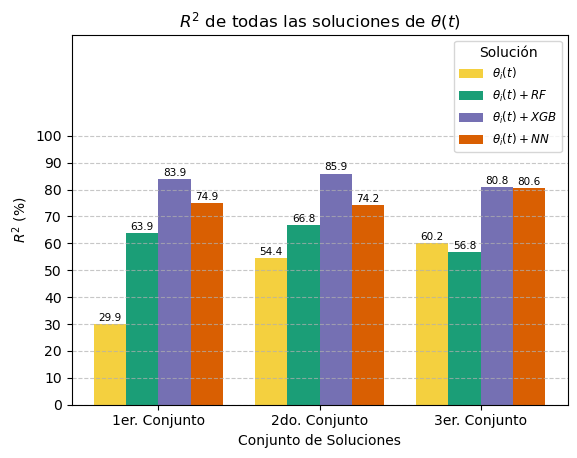

In [263]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append(29.9)
vec1.append(63.9)
vec1.append(83.9)
vec1.append(74.9)

vec2.append(54.4)
vec2.append(66.8)
vec2.append(85.9)
vec2.append(74.2)

vec3.append(60.2)
vec3.append(56.8)
vec3.append(80.8)
vec3.append(80.6)

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_comp(vec, "theta")

## $\phi$ (con MdAPE)

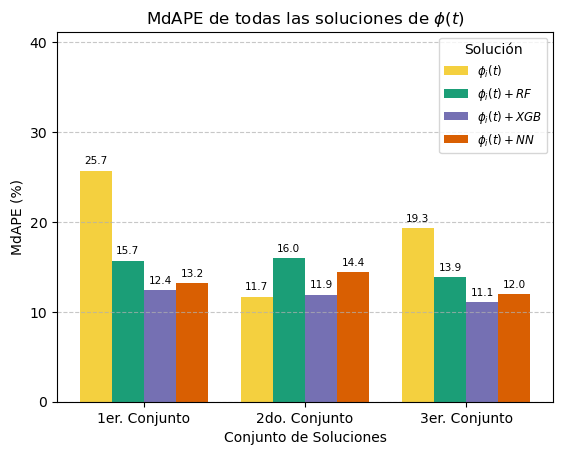

In [264]:
vec, vec1, vec2, vec3 = [], [], [], []

vec1.append(25.7)
vec1.append(15.7)
vec1.append(12.4)
vec1.append(13.2)

vec2.append(11.7)
vec2.append(16.0)
vec2.append(11.9)
vec2.append(14.4)

vec3.append(19.3)
vec3.append(13.9)
vec3.append(11.1)
vec3.append(12.0)

vec.append(vec1)
vec.append(vec2)
vec.append(vec3)

vec = np.array(vec)

bars_comp(vec, "phi")